In [2]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.1.0 requ

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
#Clasificacion de metricas
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
import seaborn as sns 
#Metodo del codo: visualizacion del elbow
from yellowbrick.cluster import KElbowVisualizer
#Kmans
from sklearn.cluster import KMeans
#Para la silueta
from sklearn.metrics import silhouette_score
#Dendograma
import scipy.cluster.hierarchy as sch
#Howkings : Una vez instalado el howkings
from pyclustertend import hopkins
#Para ver los valores NULOS
import missingno as msno # para graficar  y visualizar los valores nulos

In [2]:
df = pd.read_excel("bddExamen2B.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Source.Name                     27706 non-null  object 
 1   DIA                             27706 non-null  int64  
 2   MES                             27706 non-null  int64  
 3   ANO                             10724 non-null  float64
 4   REGIMEN ADUANERO                27706 non-null  object 
 5   REFRENDO                        27706 non-null  object 
 6   DAU                             25273 non-null  float64
 7   ITEM                            27706 non-null  int64  
 8   RUC IMPORTADOR                  27698 non-null  float64
 9   IMPORTADOR                      27705 non-null  object 
 10  PAÍS DE ORIGEN                  10724 non-null  object 
 11  PAIS DE PROCEDENCIA             27694 non-null  object 
 12  CIUDAD EMBARQUE                 

In [4]:
df

Source.Name  DIA  MES     ANO  \
0      29680_20230310181423_report.xlsx   14    1  2022.0   
1      29680_20230310181423_report.xlsx    5    1  2022.0   
2      29680_20230310181423_report.xlsx    5    1  2022.0   
3      29680_20230310181423_report.xlsx    5    1  2022.0   
4      29680_20230310181423_report.xlsx    5    1  2022.0   
...                                 ...  ...  ...     ...   
27701  29680_20230310184728_report.xlsx   15   12     NaN   
27702  29680_20230310184728_report.xlsx    6   12     NaN   
27703  29680_20230310184728_report.xlsx   12   12     NaN   
27704  29680_20230310184728_report.xlsx   13   12     NaN   
27705  29680_20230310184728_report.xlsx   20   12     NaN   

            REGIMEN ADUANERO              REFRENDO         DAU  ITEM  \
0      IMPORTACION A CONSUMO  028-2022-10-00041325       107.0   141   
1      IMPORTACION A CONSUMO  028-2022-10-00008758  60103282.0     5   
2      IMPORTACION A CONSUMO  028-2022-10-00008758  60103282.0    18   
3      IMPORTACION A CONSUMO  028-2022-10-00008758  60103282.0    19   
4      IMPORTACION A CONSUMO  028-2022-10-00008758  60103282.0    20   
...                      ...                   ...         ...   ...   
27701    IMPORTACION COURIER  055-2017-91-00858211         NaN     1   
27702    IMPORTACION COURIER  019-2017-91-00832807         NaN     1   
27703    IMPORTACION COURIER  055-2017-91-00845387         NaN     7   
27704    IMPORTACION COURIER  055-2017-91-00848945         NaN     3   
27705    IMPORTACION COURIER  055-2017-91-00869046         NaN     1   

       RUC IMPORTADOR                                         IMPORTADOR  ...  \
0        9.303526e+11                                       WENG QUANJIN  ...   
1        9.508644e+11                         AVILA CARPIO DORIS NATHALY  ...   
2        9.508644e+11                         AVILA CARPIO DORIS NATHALY  ...   
3        9.508644e+11                         AVILA CARPIO DORIS NATHALY  ...   
4        9.508644e+11                         AVILA CARPIO DORIS NATHALY  ...   
...               ...                                                ...  ...   
27701    1.716276e+12                         MENDEZ MAIGUA PABLO DANILO  ...   
27702    1.791413e+12                                GRUPO TRANSBEL S.A.  ...   
27703    1.792132e+12                               FRECANVAL CIA. LTDA.  ...   
27704    1.792283e+12                             SIDEROPOLIS CIA. LTDA.  ...   
27705    1.792235e+12  DISEÑO Y CONSTRUCCIONES ELECTRICAS LUIS CORDOV...  ...   

      FECHA DE LIQUIDACIÓN FECHA AFORO INCOTERM  \
0               20220114.0  20220119.0      FOB   
1               20220105.0  20220119.0      FOB   
2               20220105.0  20220119.0      FOB   
3               20220105.0  20220119.0      FOB   
4               20220105.0  20220119.0      FOB   
...                    ...         ...      ...   
27701                  NaN         NaN      NaN   
27702                  NaN         NaN      NaN   
27703                  NaN         NaN      NaN   
27704                  NaN         NaN      NaN   
27705                  NaN         NaN      NaN   

                                        AGENCIA DE CARGA CODIGO DE LIBERACION  \
0                          ZZ OTROS LIBERADORES DIRECTOS                    -   
1      MARITIME SERVICES LINE DEL ECUADOR MSL DEL ECU...                    -   
2      MARITIME SERVICES LINE DEL ECUADOR MSL DEL ECU...                    -   
3      MARITIME SERVICES LINE DEL ECUADOR MSL DEL ECU...                    -   
4      MARITIME SERVICES LINE DEL ECUADOR MSL DEL ECU...                    -   
...                                                  ...                  ...   
27701                                                NaN                  NaN   
27702                                                NaN                  NaN   
27703                                                NaN                  NaN   
27704                             

<AxesSubplot:title={'center':'Pearson'}>

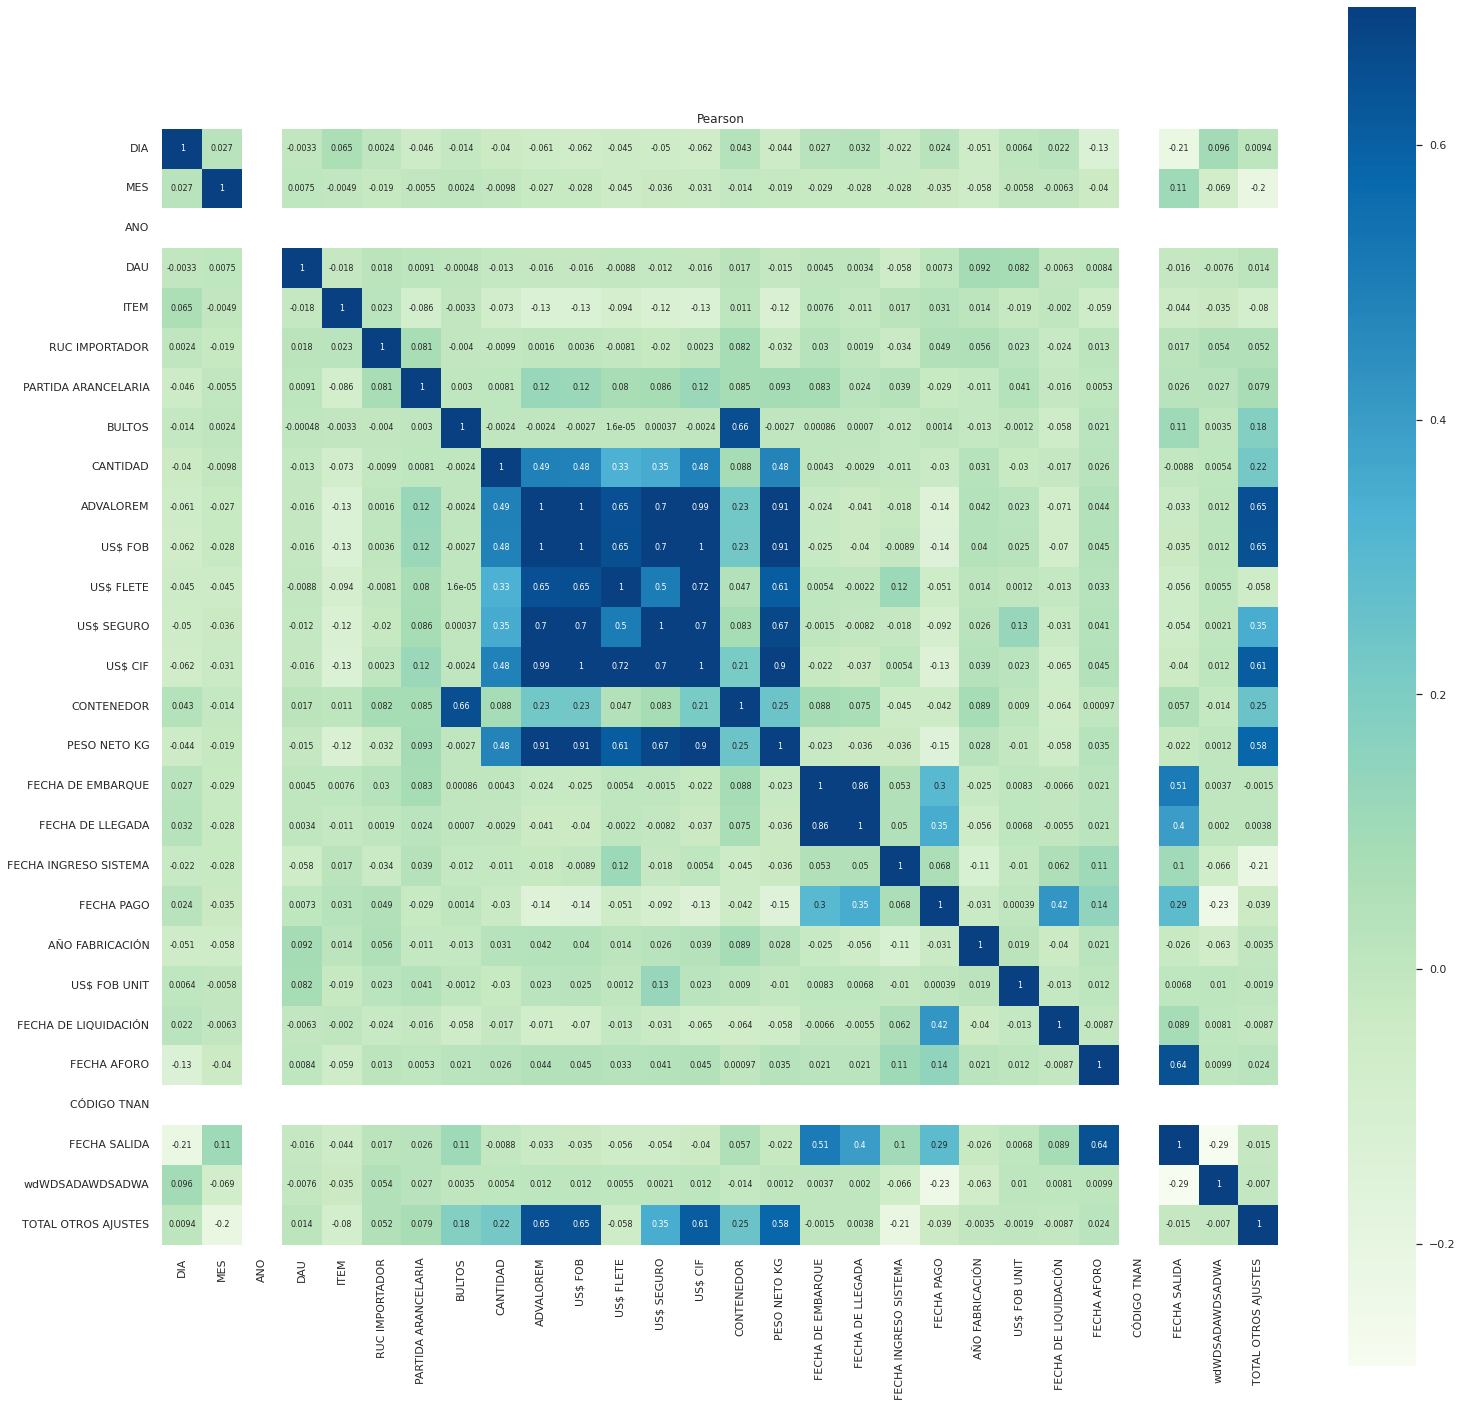

In [5]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(25,25))
plt.title('Pearson')
"sns.heatmap(df.corr(),vmax=0.7,annot=True)"
sns.heatmap(df.corr(),vmax=0.7,square=True, cmap="GnBu",annot=True,annot_kws={'size':8})

In [6]:
df = df.drop('Source.Name',axis=1)
df = df.drop('wdWDSADAWDSADWA',axis=1)
df = df.drop('ANO',axis=1)
df = df.drop('CÓDIGO TNAN',axis=1)

<AxesSubplot:>

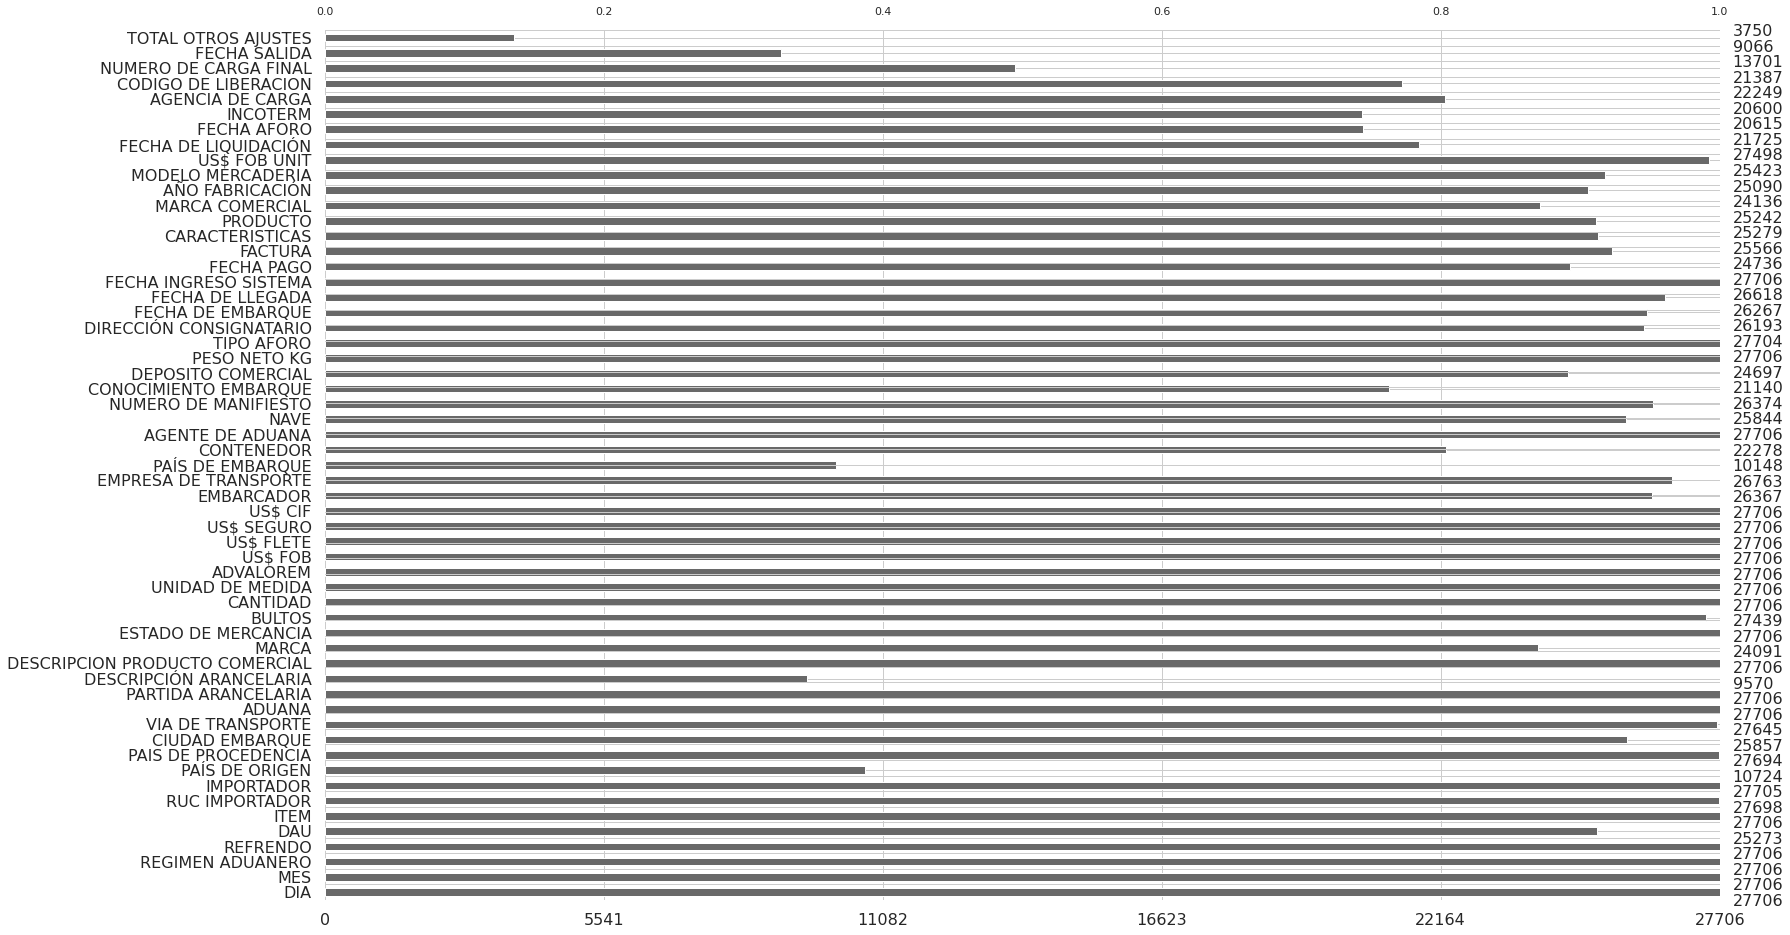

In [7]:
msno.bar(df)

In [8]:
colNAN = [col for col in df.columns if df[col].isnull().any()]
colNAN

['DAU',
 'RUC IMPORTADOR',
 'IMPORTADOR',
 'PAÍS DE ORIGEN',
 'PAIS DE PROCEDENCIA',
 'CIUDAD EMBARQUE',
 'VIA DE TRANSPORTE',
 'DESCRIPCIÓN ARANCELARIA',
 'MARCA',
 'BULTOS',
 'EMBARCADOR',
 'EMPRESA DE TRANSPORTE',
 'PAÍS DE EMBARQUE',
 'CONTENEDOR',
 'NAVE',
 'NUMERO DE MANIFIESTO',
 'CONOCIMIENTO EMBARQUE',
 'DEPOSITO COMERCIAL',
 'TIPO AFORO',
 'DIRECCIÓN CONSIGNATARIO',
 'FECHA DE EMBARQUE',
 'FECHA DE LLEGADA',
 'FECHA PAGO',
 'FACTURA',
 'CARACTERISTICAS',
 'PRODUCTO',
 'MARCA COMERCIAL',
 'AÑO FABRICACIÓN',
 'MODELO MERCADERIA',
 'US$ FOB UNIT',
 'FECHA DE LIQUIDACIÓN',
 'FECHA AFORO',
 'INCOTERM',
 'AGENCIA DE CARGA',
 'CODIGO DE LIBERACION',
 'NUMERO DE CARGA FINAL',
 'FECHA SALIDA',
 'TOTAL OTROS AJUSTES']

In [9]:
df.isnull().sum()

DIA                                   0
MES                                   0
REGIMEN ADUANERO                      0
REFRENDO                              0
DAU                                2433
ITEM                                  0
RUC IMPORTADOR                        8
IMPORTADOR                            1
PAÍS DE ORIGEN                    16982
PAIS DE PROCEDENCIA                  12
CIUDAD EMBARQUE                    1849
VIA DE TRANSPORTE                    61
ADUANA                                0
PARTIDA ARANCELARIA                   0
DESCRIPCIÓN ARANCELARIA           18136
DESCRIPCION PRODUCTO COMERCIAL        0
MARCA                              3615
ESTADO DE MERCANCIA                   0
BULTOS                              267
CANTIDAD                              0
UNIDAD DE MEDIDA                      0
ADVALOREM                             0
US$ FOB                               0
US$ FLETE                             0
US$ SEGURO                            0


<AxesSubplot:title={'center':'Pearson'}>

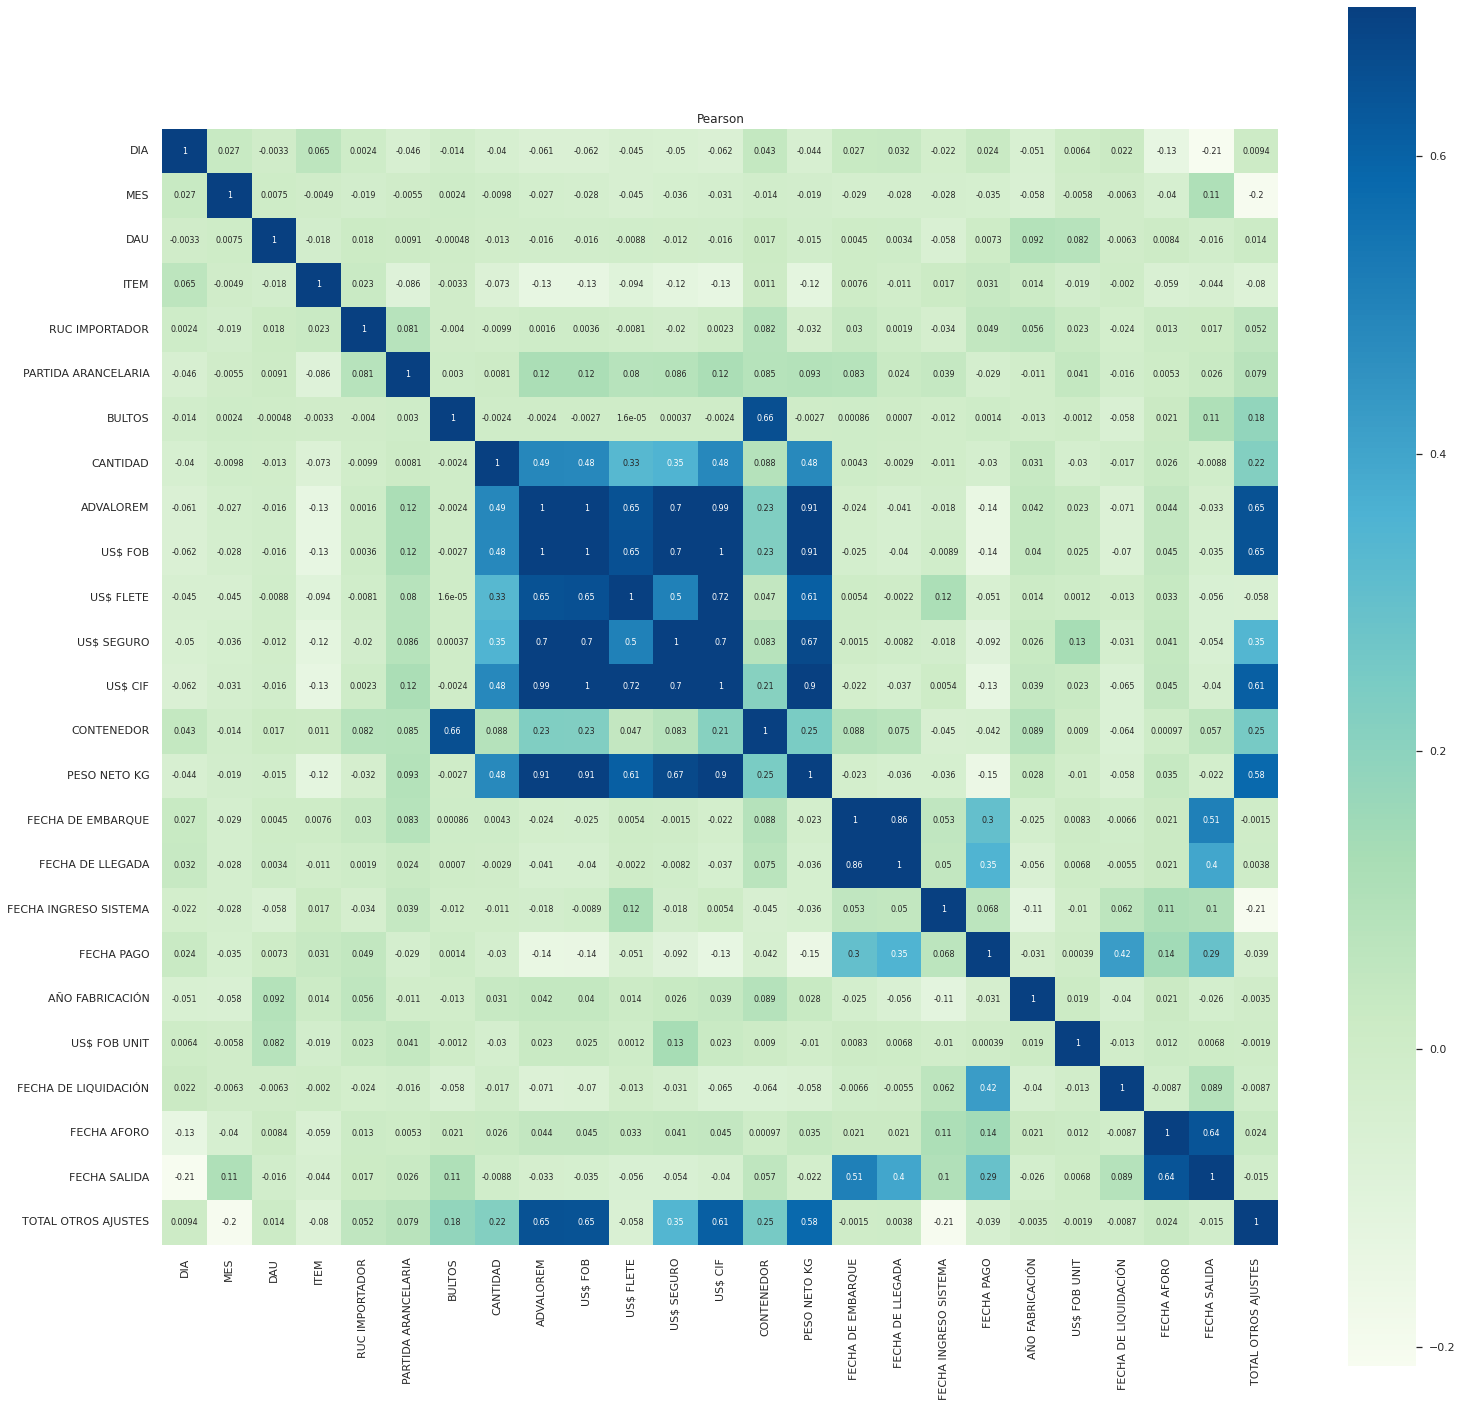

In [10]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(25,25))
plt.title('Pearson')
"sns.heatmap(df.corr(),vmax=0.7,annot=True)"
sns.heatmap(df.corr(),vmax=0.7,square=True, cmap="GnBu",annot=True,annot_kws={'size':8})

In [11]:
df = df.drop('US$ FOB',axis=1)
df = df.drop('US$ FLETE',axis=1)
df = df.drop('US$ SEGURO',axis=1)
df = df.drop('US$ CIF',axis=1)
df = df.drop('MARCA COMERCIAL',axis=1)

<AxesSubplot:title={'center':'Pearson'}>

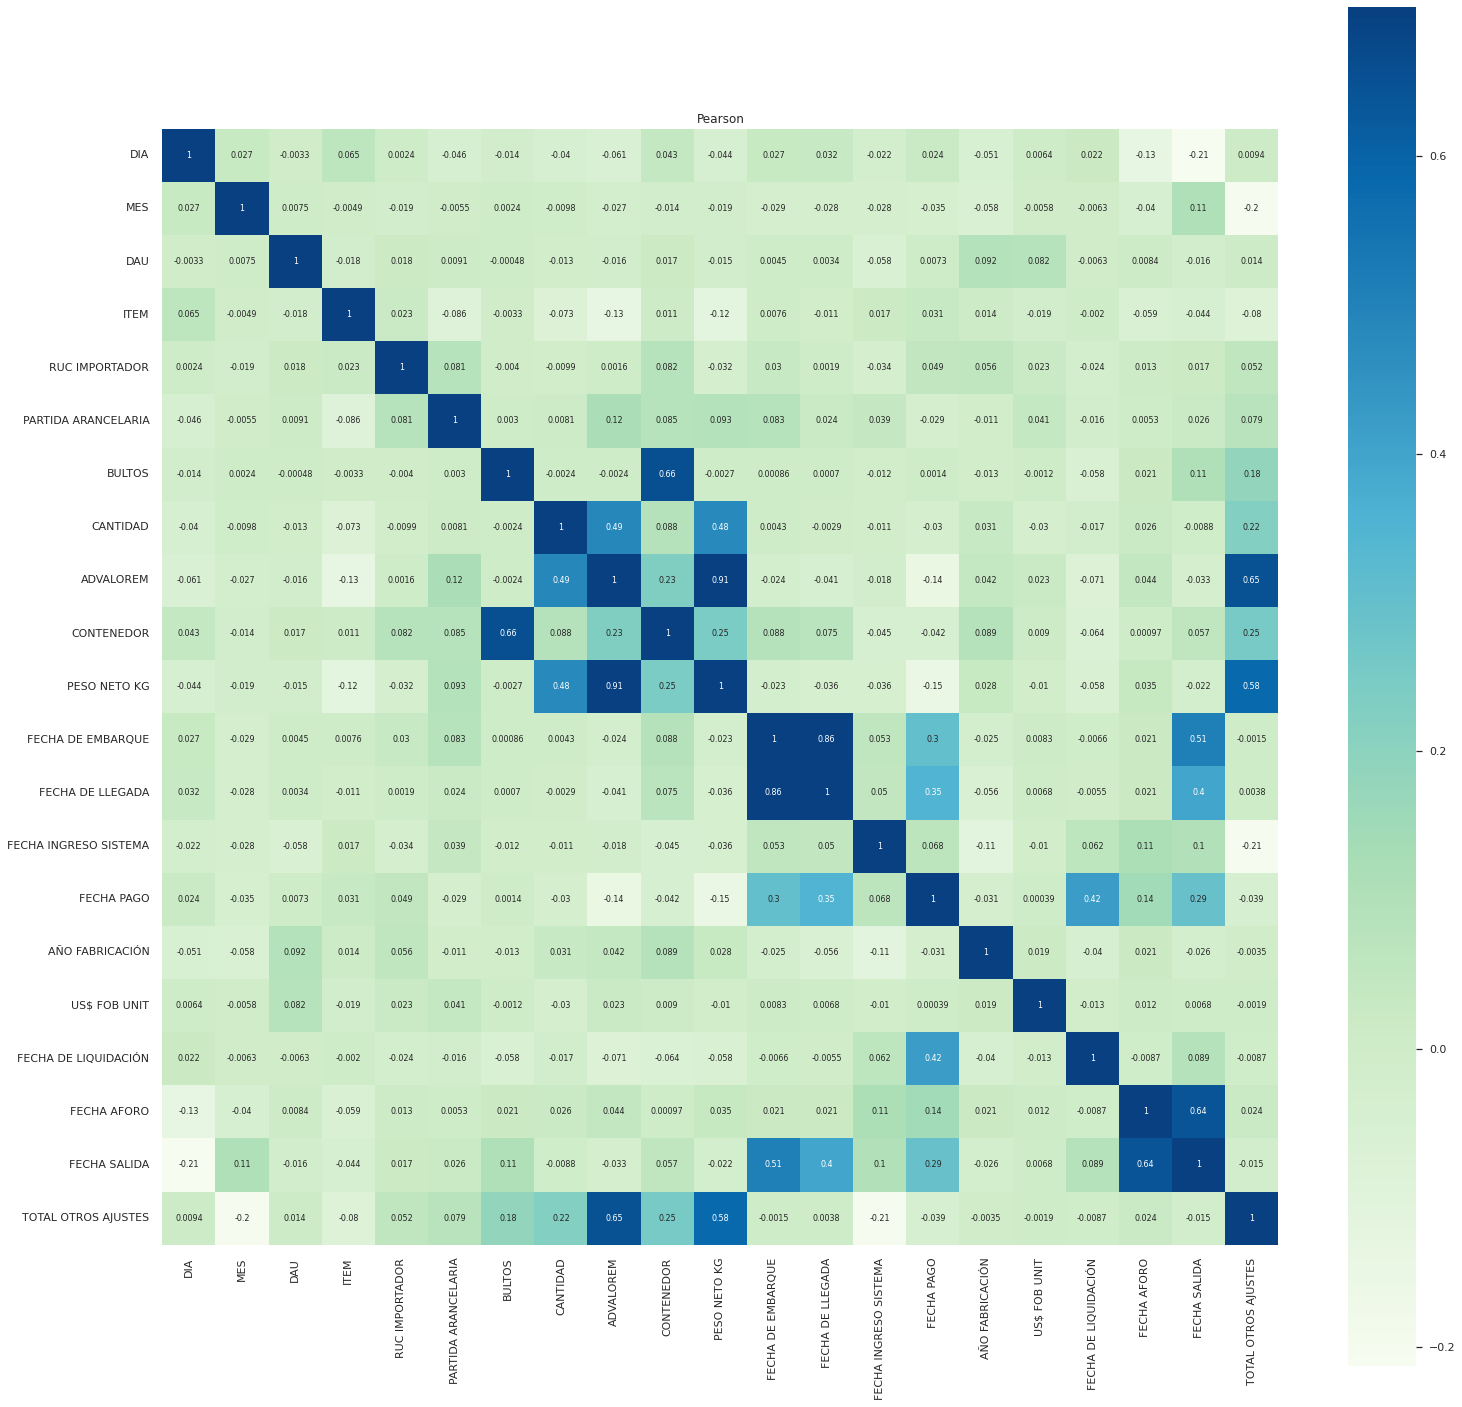

In [12]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(25,25))
plt.title('Pearson')
"sns.heatmap(df.corr(),vmax=0.7,annot=True)"
sns.heatmap(df.corr(),vmax=0.7,square=True, cmap="GnBu",annot=True,annot_kws={'size':8})

In [13]:
df = df.drop('TOTAL OTROS AJUSTES',axis=1)
df = df.drop('NUMERO DE CARGA FINAL',axis=1)
df = df.drop('FECHA SALIDA',axis=1)
df = df.drop('CODIGO DE LIBERACION',axis=1)
df = df.drop('DIA',axis=1)
df = df.drop('AGENTE DE ADUANA',axis=1)
df = df.drop('ITEM',axis=1)
df = df.drop('NUMERO DE MANIFIESTO',axis=1)
df = df.drop('CONOCIMIENTO EMBARQUE',axis=1)
df = df.drop('EMBARCADOR',axis=1)
df = df.drop('FACTURA',axis=1)
df = df.drop('CARACTERISTICAS',axis=1)
df = df.drop('MARCA',axis=1)
df = df.drop('MODELO MERCADERIA',axis=1)
df = df.drop('FECHA AFORO',axis=1)
df = df.drop('RUC IMPORTADOR',axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             27706 non-null  int64  
 1   REGIMEN ADUANERO                27706 non-null  object 
 2   REFRENDO                        27706 non-null  object 
 3   DAU                             25273 non-null  float64
 4   IMPORTADOR                      27705 non-null  object 
 5   PAÍS DE ORIGEN                  10724 non-null  object 
 6   PAIS DE PROCEDENCIA             27694 non-null  object 
 7   CIUDAD EMBARQUE                 25857 non-null  object 
 8   VIA DE TRANSPORTE               27645 non-null  object 
 9   ADUANA                          27706 non-null  object 
 10  PARTIDA ARANCELARIA             27706 non-null  int64  
 11  DESCRIPCIÓN ARANCELARIA         9570 non-null   object 
 12  DESCRIPCION PRODUCTO COMERCIAL  

In [15]:
df = df.drop('REFRENDO',axis=1)
df = df.drop('CIUDAD EMBARQUE',axis=1)

LABEL ENCODER

In [16]:
le = LabelEncoder()
df['REGIMEN ADUANERO'] = le.fit_transform(df['REGIMEN ADUANERO'])
df['IMPORTADOR'] = le.fit_transform(df['IMPORTADOR'])
df['ADUANA'] = le.fit_transform(df['ADUANA'])
df['UNIDAD DE MEDIDA'] = le.fit_transform(df['UNIDAD DE MEDIDA'])
df['TIPO AFORO'] = le.fit_transform(df['TIPO AFORO'])

In [17]:
df['DESCRIPCIÓN ARANCELARIA'] = le.fit_transform(df['DESCRIPCIÓN ARANCELARIA'])
descripcion_arancelaria_moda = df['DESCRIPCIÓN ARANCELARIA'].mode()[0]
df['DESCRIPCIÓN ARANCELARIA'].fillna(descripcion_arancelaria_moda, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             27706 non-null  int64  
 1   REGIMEN ADUANERO                27706 non-null  int64  
 2   DAU                             25273 non-null  float64
 3   IMPORTADOR                      27706 non-null  int64  
 4   PAÍS DE ORIGEN                  10724 non-null  object 
 5   PAIS DE PROCEDENCIA             27694 non-null  object 
 6   VIA DE TRANSPORTE               27645 non-null  object 
 7   ADUANA                          27706 non-null  int64  
 8   PARTIDA ARANCELARIA             27706 non-null  int64  
 9   DESCRIPCIÓN ARANCELARIA         27706 non-null  int64  
 10  DESCRIPCION PRODUCTO COMERCIAL  27706 non-null  object 
 11  ESTADO DE MERCANCIA             27706 non-null  object 
 12  BULTOS                          

In [19]:
subset = df[['ESTADO DE MERCANCIA']]
subset.loc[subset['ESTADO DE MERCANCIA']== 'NUEVA', 'ESTADO DE MERCANCIA']= 'NUEVO'
subset.loc[subset['ESTADO DE MERCANCIA']== 'USADA', 'ESTADO DE MERCANCIA']= 'USADO'
subset.loc[subset['ESTADO DE MERCANCIA']== 'REPARADA REACONDICIONADA RECONSTRUIDA', 'ESTADO DE MERCANCIA']= 'REMANUFACTURADO'
subset.loc[subset['ESTADO DE MERCANCIA']== 'AVERIADA/DAÑADA DETERIORADA', 'ESTADO DE MERCANCIA']= 'DAÑADO'
df=pd.concat([df.drop('ESTADO DE MERCANCIA', axis=1), subset], axis=1)
df['ESTADO DE MERCANCIA'] = le.fit_transform(df['ESTADO DE MERCANCIA'])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             27706 non-null  int64  
 1   REGIMEN ADUANERO                27706 non-null  int64  
 2   DAU                             25273 non-null  float64
 3   IMPORTADOR                      27706 non-null  int64  
 4   PAÍS DE ORIGEN                  10724 non-null  object 
 5   PAIS DE PROCEDENCIA             27694 non-null  object 
 6   VIA DE TRANSPORTE               27645 non-null  object 
 7   ADUANA                          27706 non-null  int64  
 8   PARTIDA ARANCELARIA             27706 non-null  int64  
 9   DESCRIPCIÓN ARANCELARIA         27706 non-null  int64  
 10  DESCRIPCION PRODUCTO COMERCIAL  27706 non-null  object 
 11  BULTOS                          27439 non-null  float64
 12  CANTIDAD                        

In [21]:
print(df['ESTADO DE MERCANCIA'])

0        1
1        1
2        1
3        1
4        1
        ..
27701    1
27702    1
27703    1
27704    1
27705    1
Name: ESTADO DE MERCANCIA, Length: 27706, dtype: int64


In [88]:
subset = df[['AÑO FABRICACIÓN']]
subset = subset.replace([2121, 2079, 2026], [2021, 2019, 2016])
subset = subset[subset['AÑO FABRICACIÓN'] != 0]
moda = subset['AÑO FABRICACIÓN'].mode()[0]
subset['AÑO FABRICACIÓN'].fillna(moda, inplace=True)
df=pd.concat([df.drop('AÑO FABRICACIÓN', axis=1), subset], axis=1)

In [89]:
print(df['AÑO FABRICACIÓN'])

0        2022.0
1        2021.0
2        2021.0
3        2021.0
4        2021.0
          ...  
27701    2022.0
27702    2022.0
27703    2022.0
27704    2022.0
27705    2022.0
Name: AÑO FABRICACIÓN, Length: 27706, dtype: float64


In [24]:
print(df.loc[23134])

MES                                                                            6
REGIMEN ADUANERO                                                               7
DAU                                                                       4743.0
IMPORTADOR                                                                   209
PAÍS DE ORIGEN                                                               NaN
PAIS DE PROCEDENCIA                                                  NETHERLANDS
VIA DE TRANSPORTE                                                       MARITIMO
ADUANA                                                                         3
PARTIDA ARANCELARIA                                                   8516500000
DESCRIPCIÓN ARANCELARIA                                                        3
DESCRIPCION PRODUCTO COMERCIAL    MICROONDAS MMX-925 DE 25LT DE ACERO INOXIDABLE
BULTOS                                                                       NaN
CANTIDAD                    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27706 entries, 0 to 27705
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             27706 non-null  int64  
 1   REGIMEN ADUANERO                27706 non-null  int64  
 2   DAU                             25273 non-null  float64
 3   IMPORTADOR                      27706 non-null  int64  
 4   PAÍS DE ORIGEN                  10724 non-null  object 
 5   PAIS DE PROCEDENCIA             27694 non-null  object 
 6   VIA DE TRANSPORTE               27645 non-null  object 
 7   ADUANA                          27706 non-null  int64  
 8   PARTIDA ARANCELARIA             27706 non-null  int64  
 9   DESCRIPCIÓN ARANCELARIA         27706 non-null  int64  
 10  DESCRIPCION PRODUCTO COMERCIAL  27706 non-null  object 
 11  BULTOS                          27439 non-null  float64
 12  CANTIDAD                        

In [26]:
#subset = df[['CODIGO DE LIBERACION']]
#subset.loc[subset['CODIGO DE LIBERACION']== '0413-IMPORTACIONES DEL ESTADO JUNTA BENEFICENCIA SOLCA  COPCI ART 125 D)', 'CODIGO DE LIBERACION']= '0413-IMPORTACIONES DEL ESTADO, JUNTA BENEFICENCIA, SOLCA,  COPCI, ART 125 D).'
#subset.loc[subset['CODIGO DE LIBERACION']== '0413-IMPORTACIONES DEL ESTADO JUNTA BENEFICENCIA SOLCA  COPCI ART 125 D).', 'CODIGO DE LIBERACION']= '0413-IMPORTACIONES DEL ESTADO, JUNTA BENEFICENCIA, SOLCA,  COPCI, ART 125 D).'
#subset.loc[subset['CODIGO DE LIBERACION']== '0413-IMPORTACIONES DEL ESTADO, JUNTA BENEFICENCIA, SOLCA,  COPCI, ART 125 D),', 'CODIGO DE LIBERACION']= '20413-IMPORTACIONES DEL ESTADO, JUNTA BENEFICENCIA, SOLCA,  COPCI, ART 125 D).'
#subset.loc[subset['CODIGO DE LIBERACION']== '0750-17. Cocinas de uso domstico elctricas y las que funcionen exclusivamente mediante mecanismos elctricos de inducci¢n, incluyendo las que tengan horno elctrico, as¡ como las ollas de uso domstico, dise¤adas para suutilizaci¢n en cocinas de inducci', 'CODIGO DE LIBERACION']= '0750-17. Cocinas de uso doméstico eléctricas y las que funcionen exclusivamente mediante mecanismos eléctricos de inducción, incluyendo las que tengan horno eléctrico, así como las ollas de uso doméstico, diseñadas para suutilización en cocinas de inducci'
#subset = subset[subset['CODIGO DE LIBERACION'] != '-']
#cod_moda = subset['CODIGO DE LIBERACION'].mode()[0]
#subset['CODIGO DE LIBERACION'].fillna(cod_moda, inplace=True)
#df=pd.concat([df.drop('CODIGO DE LIBERACION', axis=1), subset], axis=1)
#df['CODIGO DE LIBERACION'] = le.fit_transform(df['CODIGO DE LIBERACION'])

In [27]:
#print(df['CODIGO DE LIBERACION'])

<AxesSubplot:>

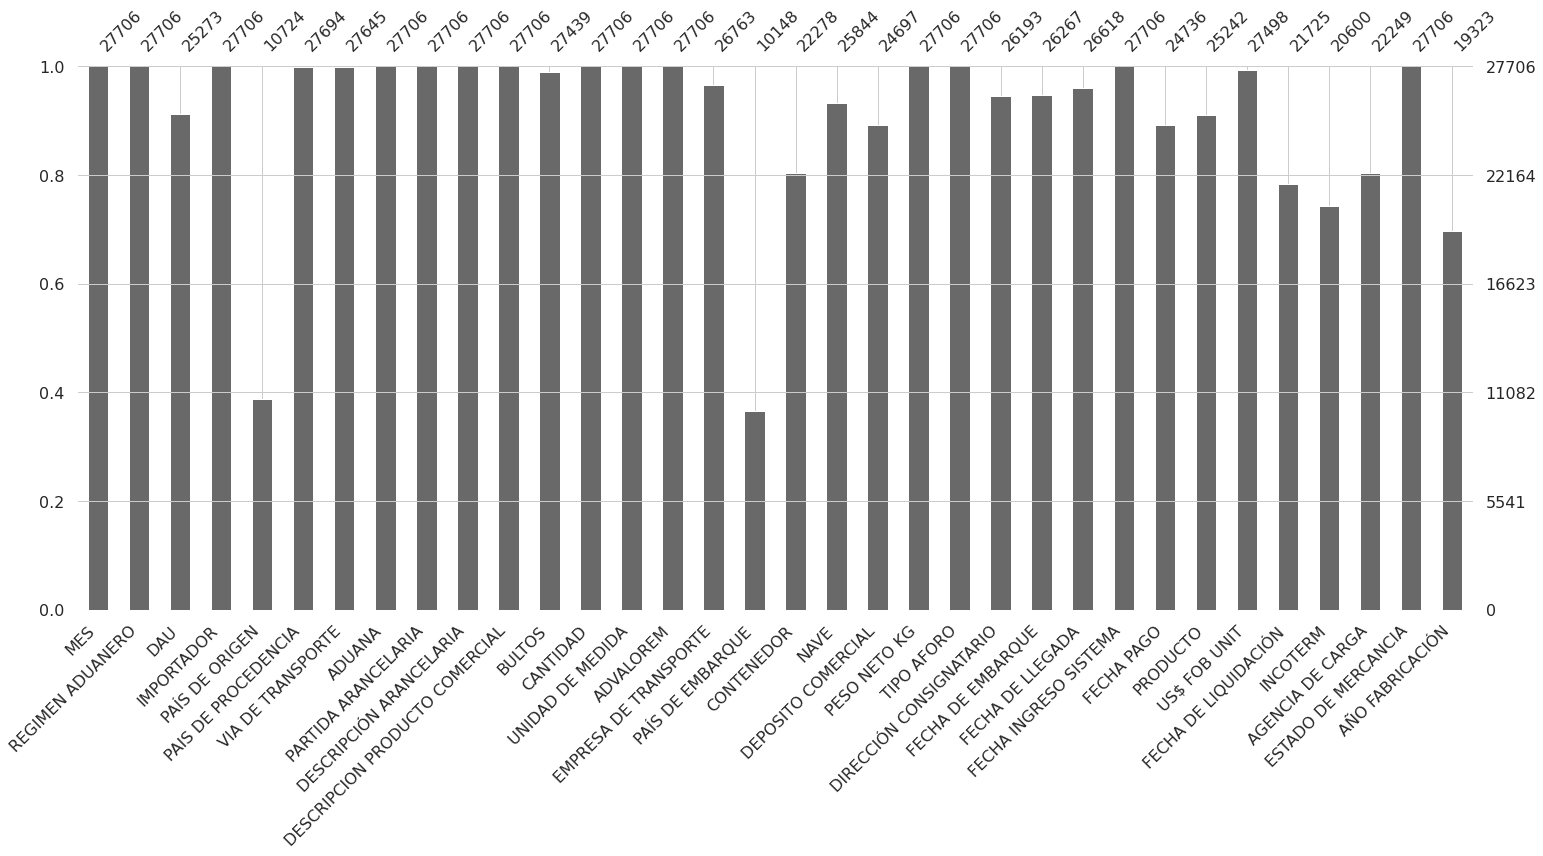

In [28]:
msno.bar(df)

In [29]:
media = df['DAU'].mean()
df['DAU'] = df['DAU'].fillna(media)

In [30]:
df['BULTOS'] = df['BULTOS'].replace(932110224,None)
media = df['BULTOS'].mean()
df['BULTOS'] = df['BULTOS'].fillna(media)

In [31]:
print(df.loc[26605])

MES                                                           8
REGIMEN ADUANERO                                              8
DAU                                                        91.0
IMPORTADOR                                                 2667
PAÍS DE ORIGEN                                              NaN
PAIS DE PROCEDENCIA                                         NaN
VIA DE TRANSPORTE                                           NaN
ADUANA                                                        2
PARTIDA ARANCELARIA                                  8516790000
DESCRIPCIÓN ARANCELARIA                                       3
DESCRIPCION PRODUCTO COMERCIAL                         WAFFLERA
BULTOS                                                    344.0
CANTIDAD                                                      2
UNIDAD DE MEDIDA                                              1
ADVALOREM                                                430.49
EMPRESA DE TRANSPORTE                   

In [32]:
media = df['CONTENEDOR'].mean()
df['CONTENEDOR'] = df['CONTENEDOR'].fillna(media)

In [33]:
media = df['US$ FOB UNIT'].mean()
df['US$ FOB UNIT'] = df['US$ FOB UNIT'].fillna(media)

<AxesSubplot:>

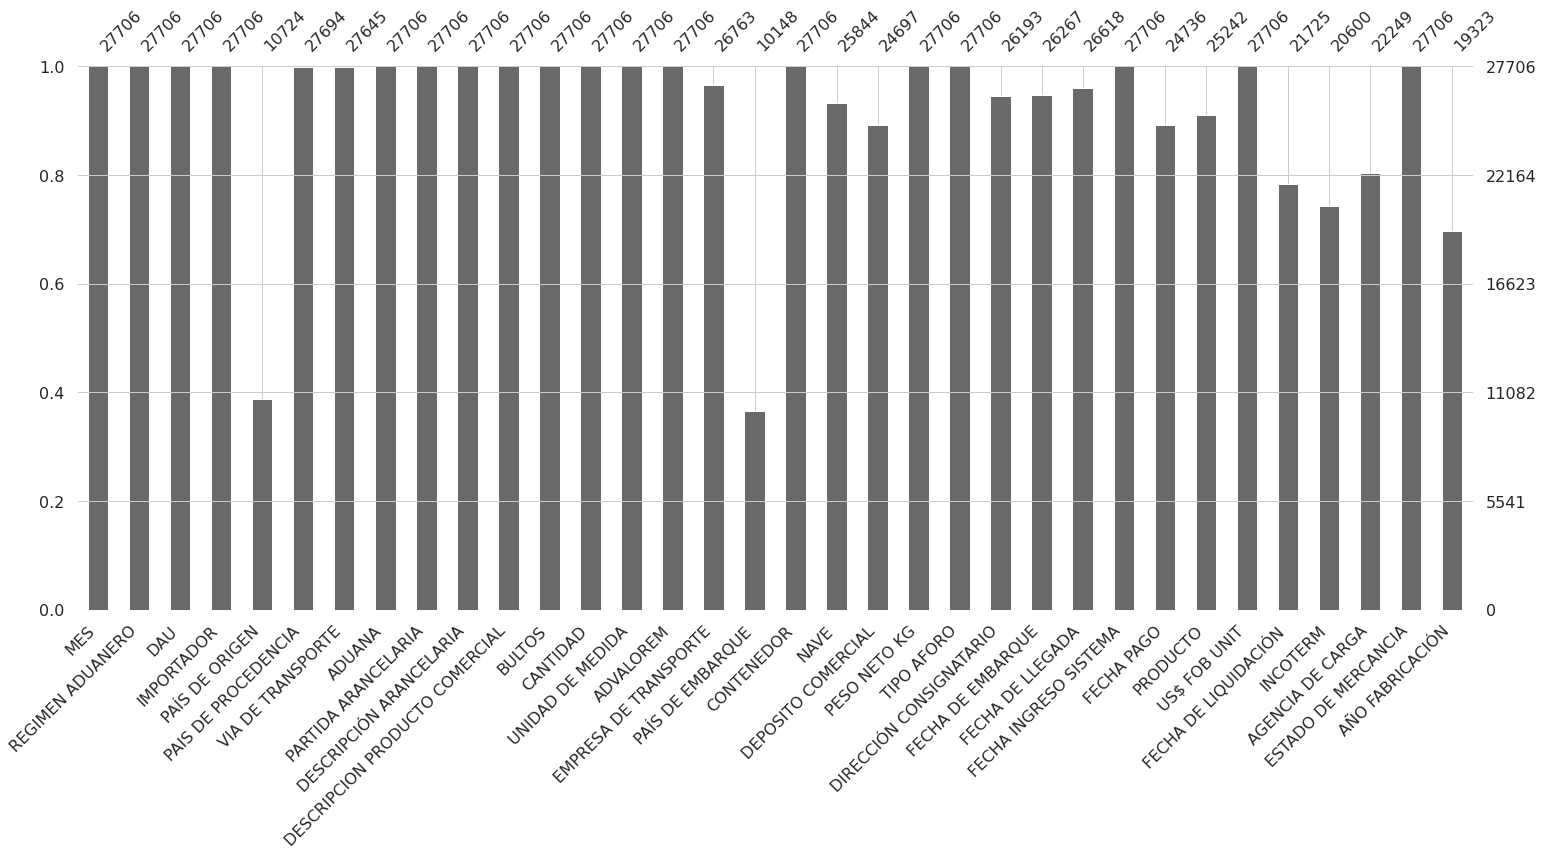

In [34]:
msno.bar(df)

In [35]:
subset = df[['VIA DE TRANSPORTE']]
subset = subset[subset['VIA DE TRANSPORTE'] != '-']
via_moda = subset['VIA DE TRANSPORTE'].mode()[0]
subset['VIA DE TRANSPORTE'].fillna(via_moda, inplace=True)
df=pd.concat([df.drop('VIA DE TRANSPORTE', axis=1), subset], axis=1)
df['VIA DE TRANSPORTE'] = le.fit_transform(df['VIA DE TRANSPORTE'])

In [36]:
print(df.loc[17324])

MES                                                9
REGIMEN ADUANERO                                   7
DAU                                            679.0
IMPORTADOR                                      2482
PAÍS DE ORIGEN                                   NaN
PAIS DE PROCEDENCIA                           PANAMA
ADUANA                                             0
PARTIDA ARANCELARIA                       8516790000
DESCRIPCIÓN ARANCELARIA                            3
DESCRIPCION PRODUCTO COMERCIAL       PISTOLA SILICON
BULTOS                                           0.0
CANTIDAD                                          48
UNIDAD DE MEDIDA                                   1
ADVALOREM                                      43.12
EMPRESA DE TRANSPORTE                            NaN
PAÍS DE EMBARQUE                                 NaN
CONTENEDOR                                       0.0
NAVE                                             NaN
DEPOSITO COMERCIAL                            

In [37]:
print(le.classes_)
print(le.transform(le.classes_))
print(via_moda)

['AEREA' 'CARRETERA' 'MARITIMO' 'ZZ NO IDENTIFICADO' 'ZZ-OTROS'
 'ZZ-OTROS (IMPORTACION)' nan]
[0 1 2 3 4 5 6]
MARITIMO


In [38]:
subset = df[['PAÍS DE ORIGEN']]
p_moda = subset['PAÍS DE ORIGEN'].mode()[0]
subset['PAÍS DE ORIGEN'].fillna(p_moda, inplace=True)
df=pd.concat([df.drop('PAÍS DE ORIGEN', axis=1), subset], axis=1)
df['PAÍS DE ORIGEN'] = le.fit_transform(df['PAÍS DE ORIGEN'])

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
print(le.classes_)
print(le.transform(le.classes_))
print(p_moda)

['BELGIUM' 'BRAZIL' 'CHINA' 'COLOMBIA' 'FRANCE' 'GERMANY' 'HONG KONG'
 'INDIA' 'ITALY' 'JAPAN' 'MALAYSIA' 'MEXICO' 'NETHERLANDS' 'PANAMA'
 'PARAGUAY' 'PERU' 'POLAND' 'PORTUGAL' 'SINGAPORE' 'SOUTH KOREA' 'SPAIN'
 'TAIWAN' 'THAILAND' 'TURKEY' 'UNITED KINGDOM' 'UNITED STATES']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
CHINA


In [40]:
df['PAIS DE PROCEDENCIA'] = df['PAIS DE PROCEDENCIA'].replace(773415,None)
subset = df[['PAIS DE PROCEDENCIA']]
subset.loc[subset['PAIS DE PROCEDENCIA']== 'VENEZUELA BOLIVARIAN REPUBLIC OF', 'PAIS DE PROCEDENCIA']= 'VENEZUELA'
moda_pp = df['PAIS DE PROCEDENCIA'].mode()
df['PAIS DE PROCEDENCIA'] = df['PAIS DE PROCEDENCIA'].fillna(moda_pp)
df['PAIS DE PROCEDENCIA'] = le.fit_transform(df['PAIS DE PROCEDENCIA'])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [41]:
print(le.classes_)
print(le.transform(le.classes_))
print(moda_pp)

['773415' 'AUSTRALIA' 'AUSTRIA' 'BELGIUM' 'BOLIVIA' 'BRAZIL' 'CANADA'
 'CHILE' 'CHINA' 'COLOMBIA' 'COREA DEL SUR' 'DENMARK' 'DOMINICAN REPUBLIC'
 'ECUADOR' 'EL SALVADOR' 'FINLAND' 'FRANCE' 'GERMANY' 'HONG KONG' 'INDIA'
 'IRAN' 'ISRAEL' 'ITALY' 'JAPAN' 'JORDAN' 'MALASIA' 'MALAYSIA' 'MEXICO'
 'NETHERLANDS' 'PANAMA' 'PARAGUAY' 'PERU' 'POLAND' 'PORTUGAL'
 'REINO UNIDO' 'SINGAPORE' 'SOUTH KOREA' 'SPAIN' 'TAIWAN' 'TURKEY'
 'UNITED ARAB EMIRATES' 'UNITED KINGDOM' 'UNITED STATES'
 'UNITED STATES MINOR OUTLYING ISLANDS' 'VENEZUELA'
 'VENEZUELA BOLIVARIAN REPUBLIC OF' nan]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
0    CHINA
dtype: object


In [42]:
print(df.loc[23893])

MES                                                                       8
REGIMEN ADUANERO                                                          8
DAU                                                            2147483647.0
IMPORTADOR                                                             1036
PAIS DE PROCEDENCIA                                                      45
ADUANA                                                                    2
PARTIDA ARANCELARIA                                              8516790000
DESCRIPCIÓN ARANCELARIA                                                   3
DESCRIPCION PRODUCTO COMERCIAL                              PLANCHA A VAPOR
BULTOS                                                                  3.0
CANTIDAD                                                                  1
UNIDAD DE MEDIDA                                                          1
ADVALOREM                                                              0.59
EMPRESA DE T

In [43]:
subset = df[['DEPOSITO COMERCIAL']]
subset.loc[subset['DEPOSITO COMERCIAL']== '05909272-FERTISA FERTILIZANTES TERMINALES I SERVI', 'DEPOSITO COMERCIAL']= '05909272-FERTISA,FERTILIZANTES,TERMINALES I SERVICIOS S.A.'
subset.loc[subset['DEPOSITO COMERCIAL']== '05909272-FERTISA, FERTILIZANTES, TERMINALES I SERVI', 'DEPOSITO COMERCIAL']= '05909272-FERTISA,FERTILIZANTES,TERMINALES I SERVICIOS S.A.'
subset.loc[subset['DEPOSITO COMERCIAL']== '05909272-FERTISA. FERTILIZANTES. TERMINALES I SERVI', 'DEPOSITO COMERCIAL']= '05909272-FERTISA,FERTILIZANTES,TERMINALES I SERVICIOS S.A.'
subset.loc[subset['DEPOSITO COMERCIAL']== '05909272-FERTISAFERTILIZANTESTERMINALES I SERVICIOS S.A.', 'DEPOSITO COMERCIAL']= '05909272-FERTISA,FERTILIZANTES,TERMINALES I SERVICIOS S.A.'
subset = subset[subset['DEPOSITO COMERCIAL'] != '-']
dep_moda = subset['DEPOSITO COMERCIAL'].mode()[0]
subset['DEPOSITO COMERCIAL'].fillna(dep_moda, inplace=True)
df=pd.concat([df.drop('DEPOSITO COMERCIAL', axis=1), subset], axis=1)
df['DEPOSITO COMERCIAL'] = le.fit_transform(df['DEPOSITO COMERCIAL'])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [44]:
print(le.classes_)
print(le.transform(le.classes_))
print(dep_moda)

['05000002-EMSAAIRPORT SERVICES CEM'
 '05000003-FRIO Y EXPORTACION S.A FRIOEXPORT'
 '05000005-TERMINAL DE CARGAS DEL ECUADOR S.A.-COURIER'
 '05777781-DPWORLD POSORJA S.A.'
 '05903009-AUTORIDAD PORTUARIA DE ESMERALDAS'
 '05904088-QC TERMINALES ECUADOR S. A. QCTE'
 '05904330-INTERCARGA INTERNACIONAL DE CARGA S.A.'
 '05906012-BODEGAS PRIVADAS TERAN CIA. LTDA.'
 '05906071-TERMINAL DE CARGAS DEL ECUADOR S.A. TERMICARGA'
 '05906090-MIDECAR MOVIMIENTOS INTERNOS DE CARGA CIA. LTDA'
 '05906600-ALMAROS CIA. LTDA.' '05906960-NAPORTEC S.A.'
 '05907400-INARPI S.A.'
 '05908310-TRANSPORTES Y SERVICIOS ASOCIADOS SYTSA CIA. LTDA'
 '05908902-TRANSPORTE Y COMERCIO INTERNACIONAL - TRANSCOMERINTER CIA. LTDA.'
 '05909025-CONTECON GUAYAQUIL S.A.'
 '05909272-FERTISA,FERTILIZANTES,TERMINALES I SERVICIOS S.A.'
 '05909371-ADUANAS Y COMERCIO EXTERIOR DEL NORTE ADUANOR CIA. LTDA.'
 '05909678-BODEGAS Y SERVICIOS ECUADOR FORTALEZA S.A. BOSEFO'
 '08901027-SERVIENTREGA ECUADOR S.A.' nan]
[ 0  1  2  3  4  5  6  7  8  9

In [45]:
df['DESCRIPCION PRODUCTO COMERCIAL'] = le.fit_transform(df['DESCRIPCION PRODUCTO COMERCIAL'])
df['EMPRESA DE TRANSPORTE'] = le.fit_transform(df['EMPRESA DE TRANSPORTE'])
df['PAÍS DE EMBARQUE'] = le.fit_transform(df['PAÍS DE EMBARQUE'])
df['NAVE'] = le.fit_transform(df['NAVE'])
df['DIRECCIÓN CONSIGNATARIO'] = le.fit_transform(df['DIRECCIÓN CONSIGNATARIO'])
df['INCOTERM'] = le.fit_transform(df['INCOTERM'])
df['AGENCIA DE CARGA'] = le.fit_transform(df['AGENCIA DE CARGA'])

In [46]:
df['PRODUCTO'] = df['PRODUCTO'].replace(1,None)
df['PRODUCTO'] = df['PRODUCTO'].replace(116369,None)
df['PRODUCTO'] = df['PRODUCTO'].replace(188419,None)
df['PRODUCTO'] = le.fit_transform(df['PRODUCTO'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27706 entries, 0 to 27705
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             27706 non-null  int64  
 1   REGIMEN ADUANERO                27706 non-null  int64  
 2   DAU                             27706 non-null  float64
 3   IMPORTADOR                      27706 non-null  int64  
 4   PAIS DE PROCEDENCIA             27706 non-null  int64  
 5   ADUANA                          27706 non-null  int64  
 6   PARTIDA ARANCELARIA             27706 non-null  int64  
 7   DESCRIPCIÓN ARANCELARIA         27706 non-null  int64  
 8   DESCRIPCION PRODUCTO COMERCIAL  27706 non-null  int64  
 9   BULTOS                          27706 non-null  float64
 10  CANTIDAD                        27706 non-null  int64  
 11  UNIDAD DE MEDIDA                27706 non-null  int64  
 12  ADVALOREM                       

<AxesSubplot:>

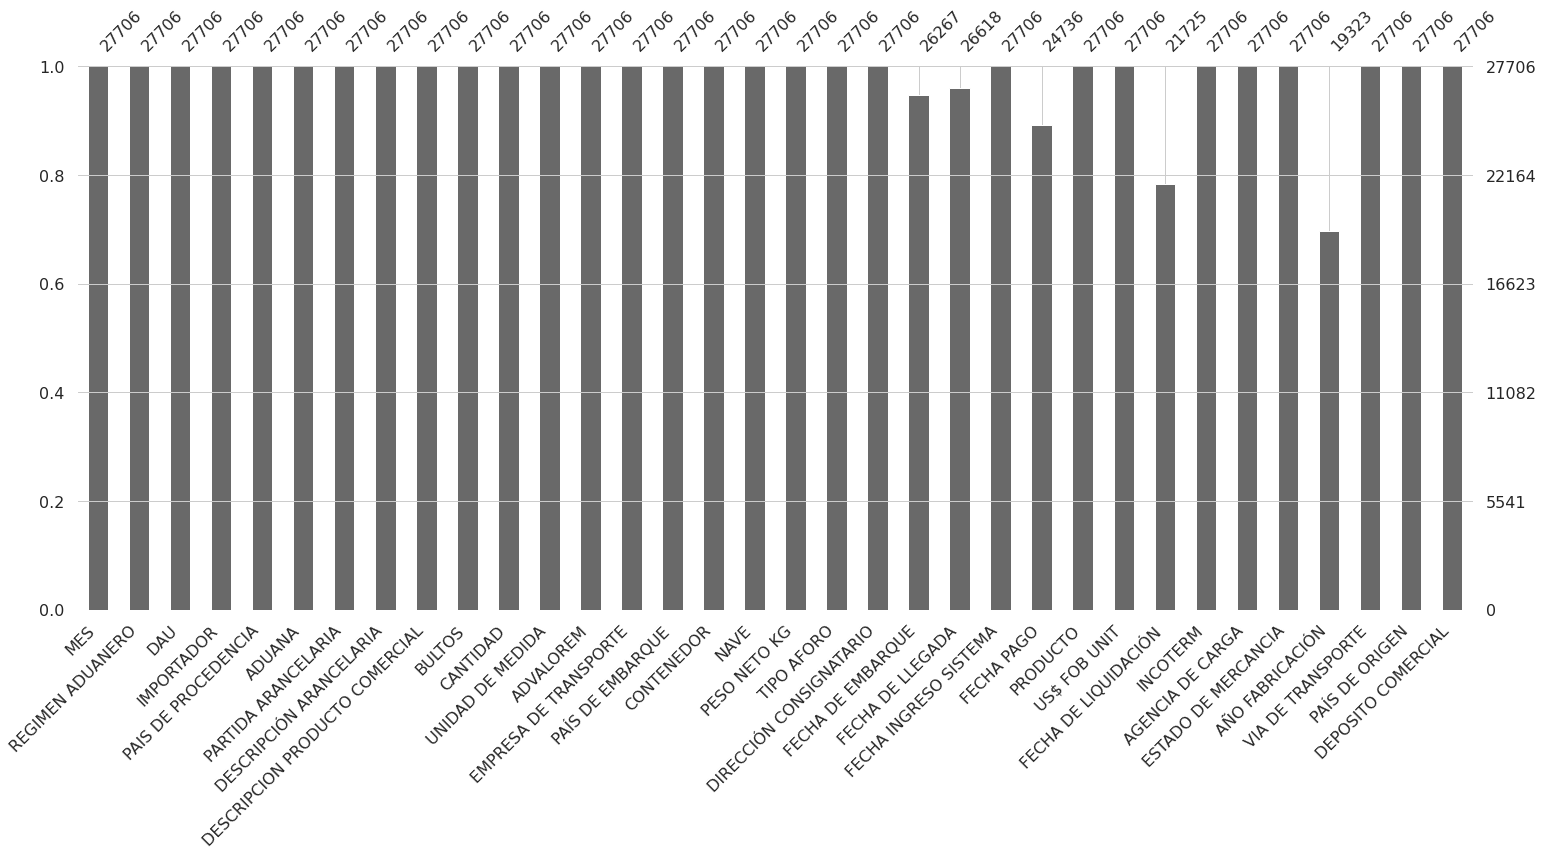

In [48]:
msno.bar(df)

In [49]:
mode = df['FECHA DE EMBARQUE'].mode()[0]
df['FECHA DE EMBARQUE'] = df['FECHA DE EMBARQUE'].fillna(mode)

In [50]:
mode = df['FECHA DE LLEGADA'].mode()[0]
df['FECHA DE LLEGADA'] = df['FECHA DE LLEGADA'].fillna(mode)

In [51]:
mode = df['FECHA PAGO'].mode()[0]
df['FECHA PAGO'] = df['FECHA PAGO'].fillna(mode)

In [52]:
mode = df['FECHA DE LIQUIDACIÓN'].mode()[0]
df['FECHA DE LIQUIDACIÓN'] = df['FECHA DE LIQUIDACIÓN'].fillna(mode)

<AxesSubplot:>

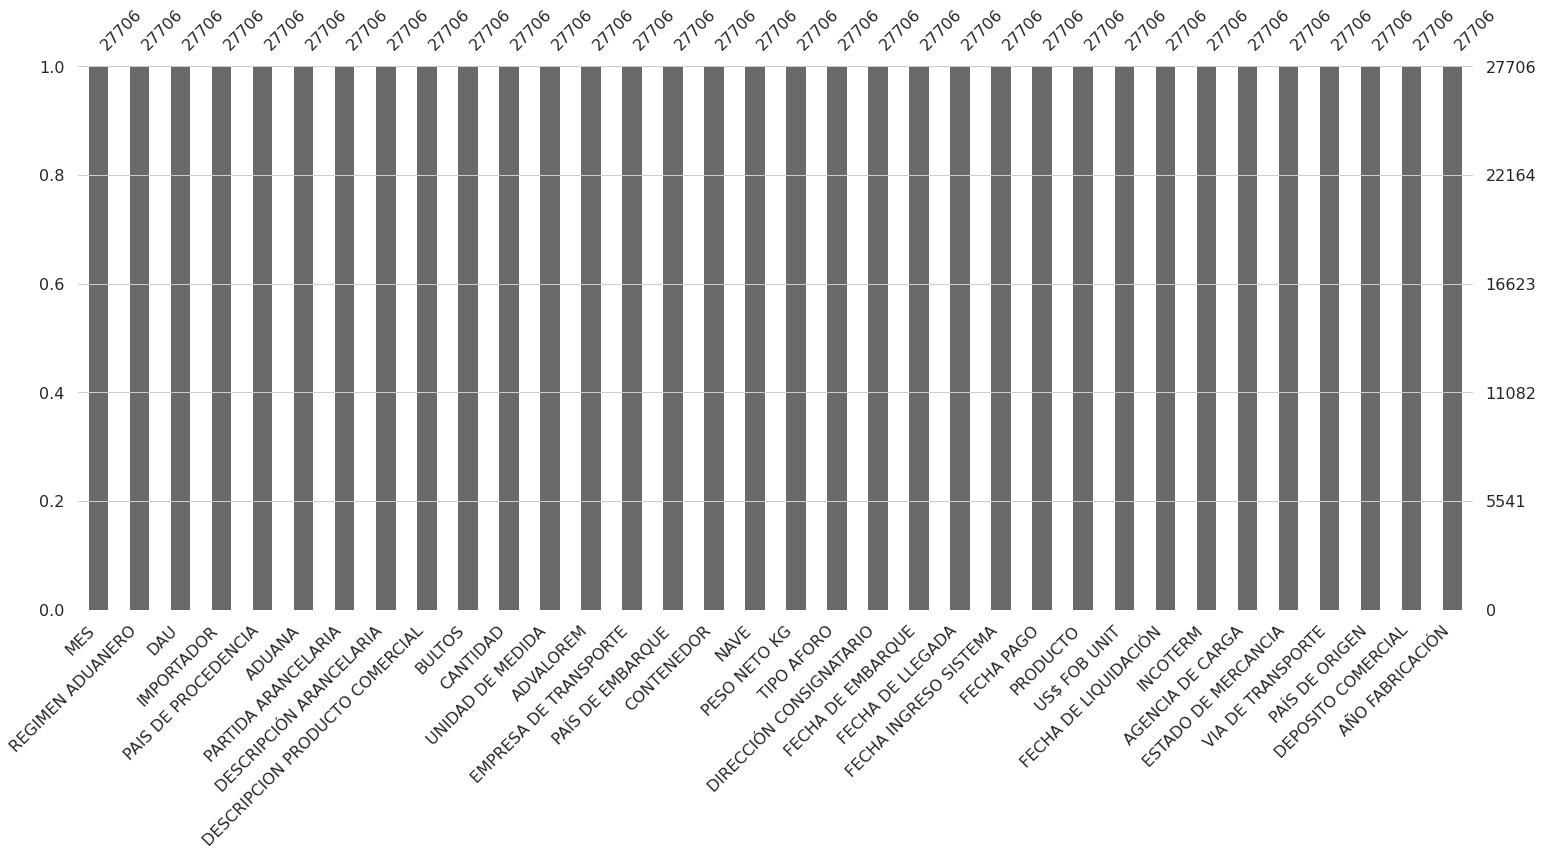

In [90]:
msno.bar(df)

<AxesSubplot:title={'center':'Pearson'}>

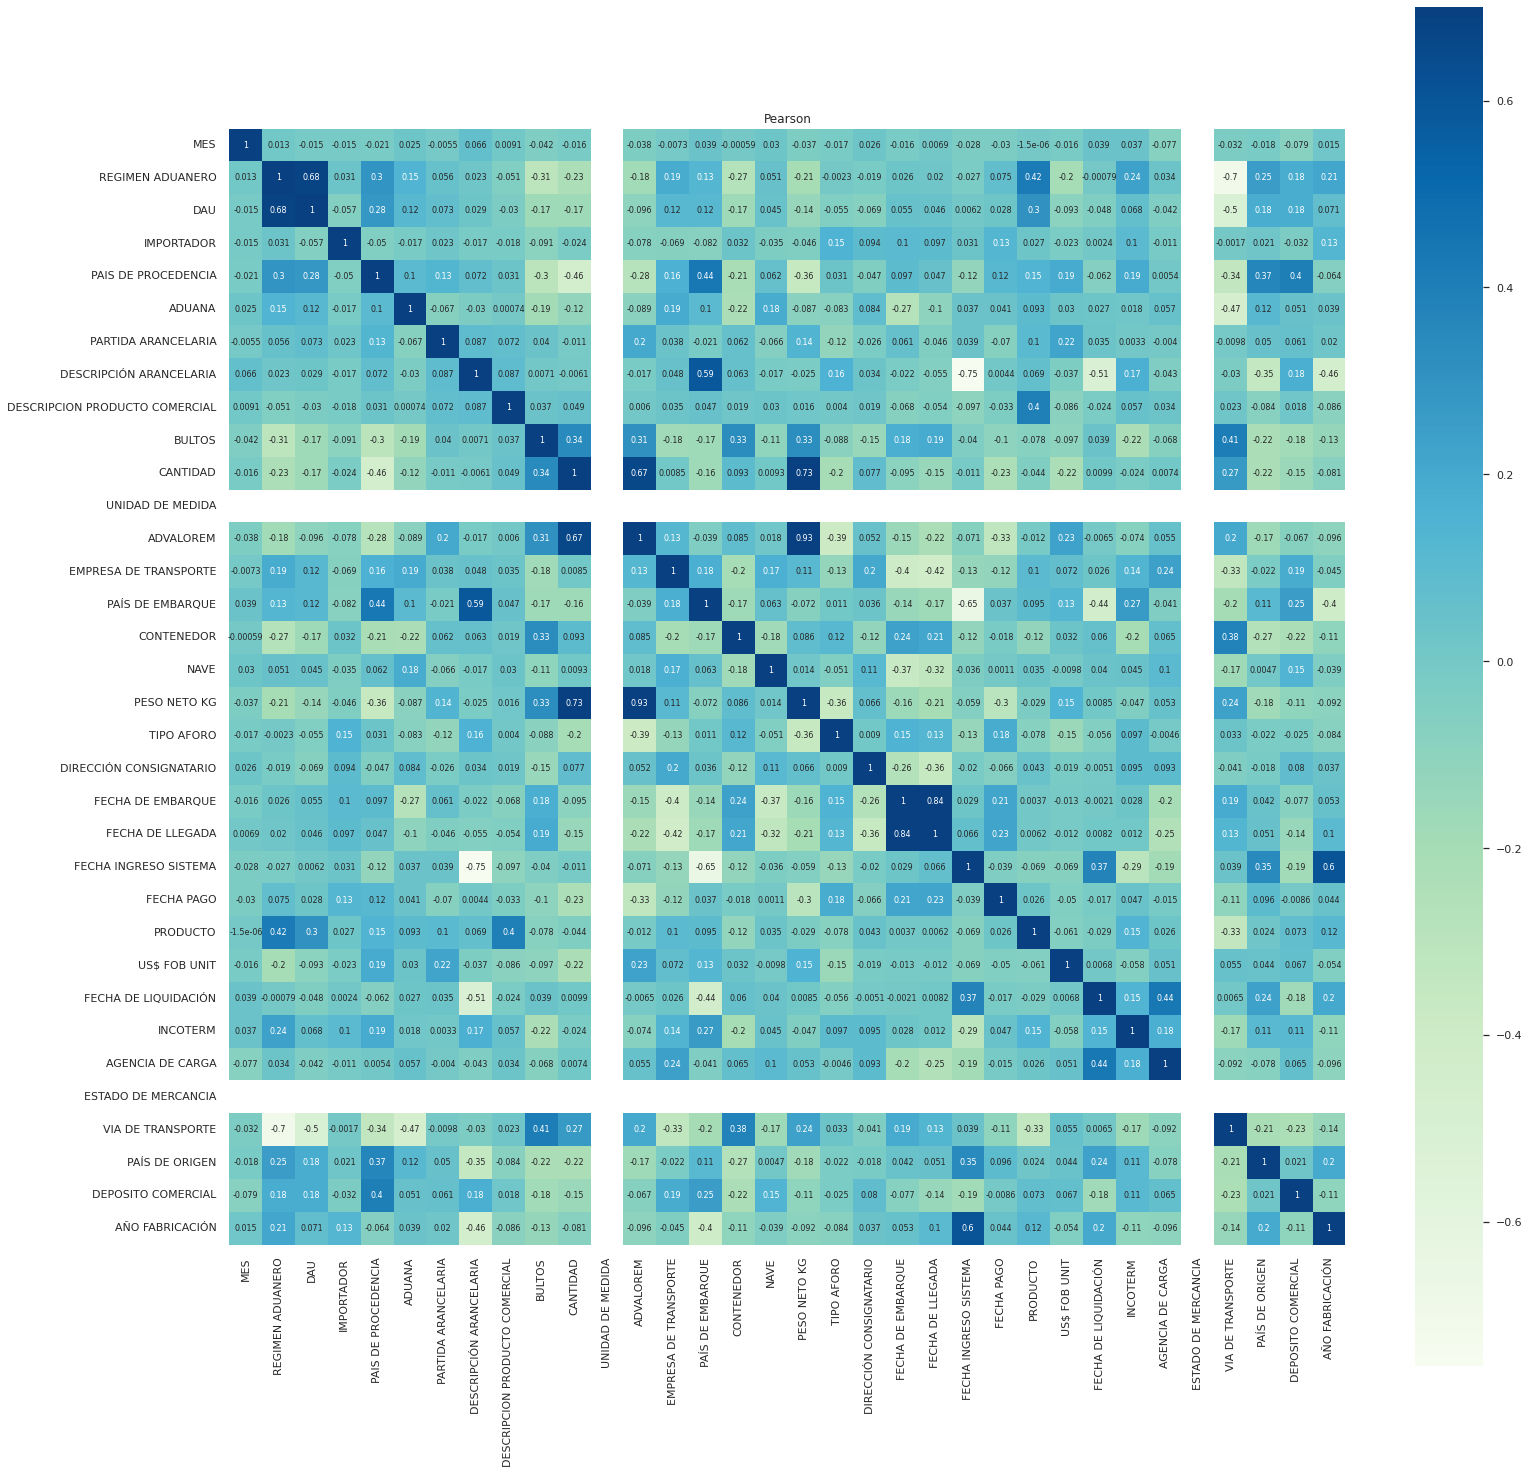

In [91]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(25,25))
plt.title('Pearson')
"sns.heatmap(df.corr(),vmax=0.7,annot=True)"
sns.heatmap(df.corr(),vmax=0.7,square=True, cmap="GnBu",annot=True,annot_kws={'size':8})

ATIPICOS

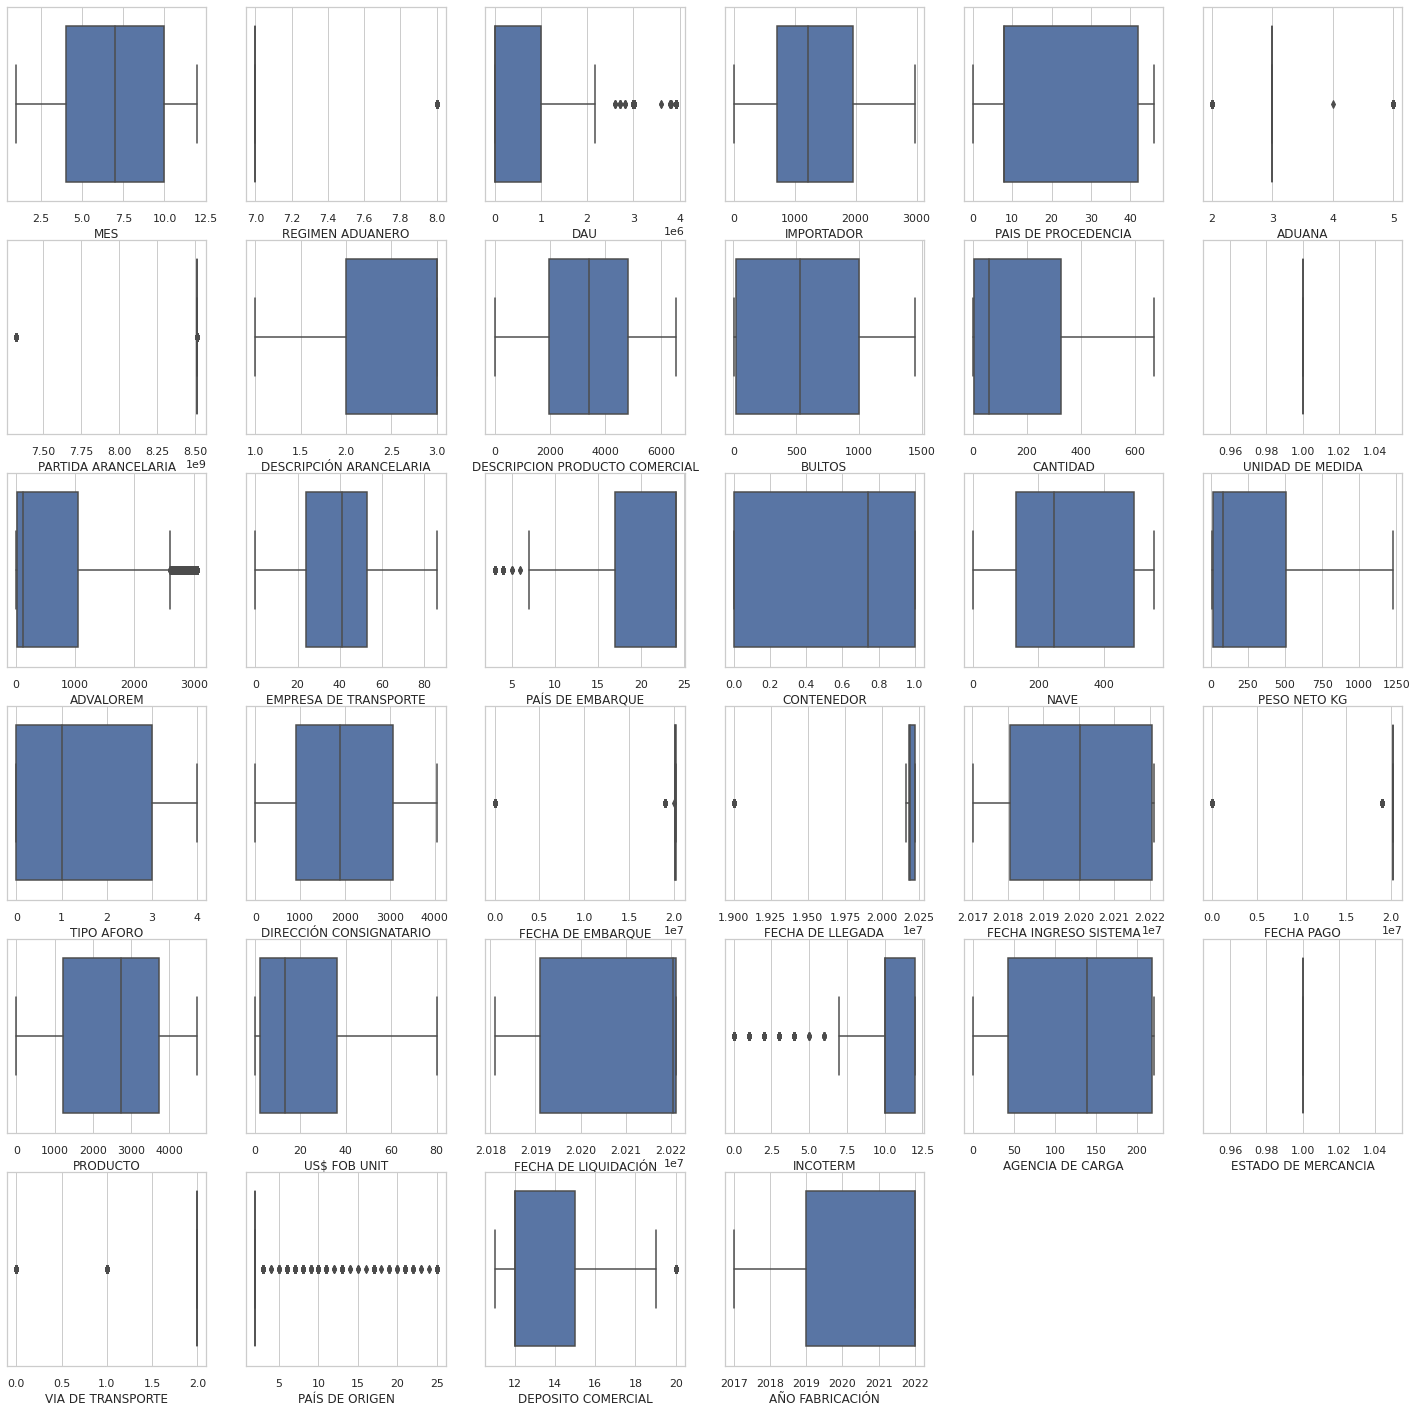

In [92]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [93]:
df.columns[1:3]

Index(['REGIMEN ADUANERO', 'DAU'], dtype='object')

In [94]:
c1 = df.columns[1:3]
for i in c1:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-94-8d1a01d9bb95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-94-8d1a01d9bb95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


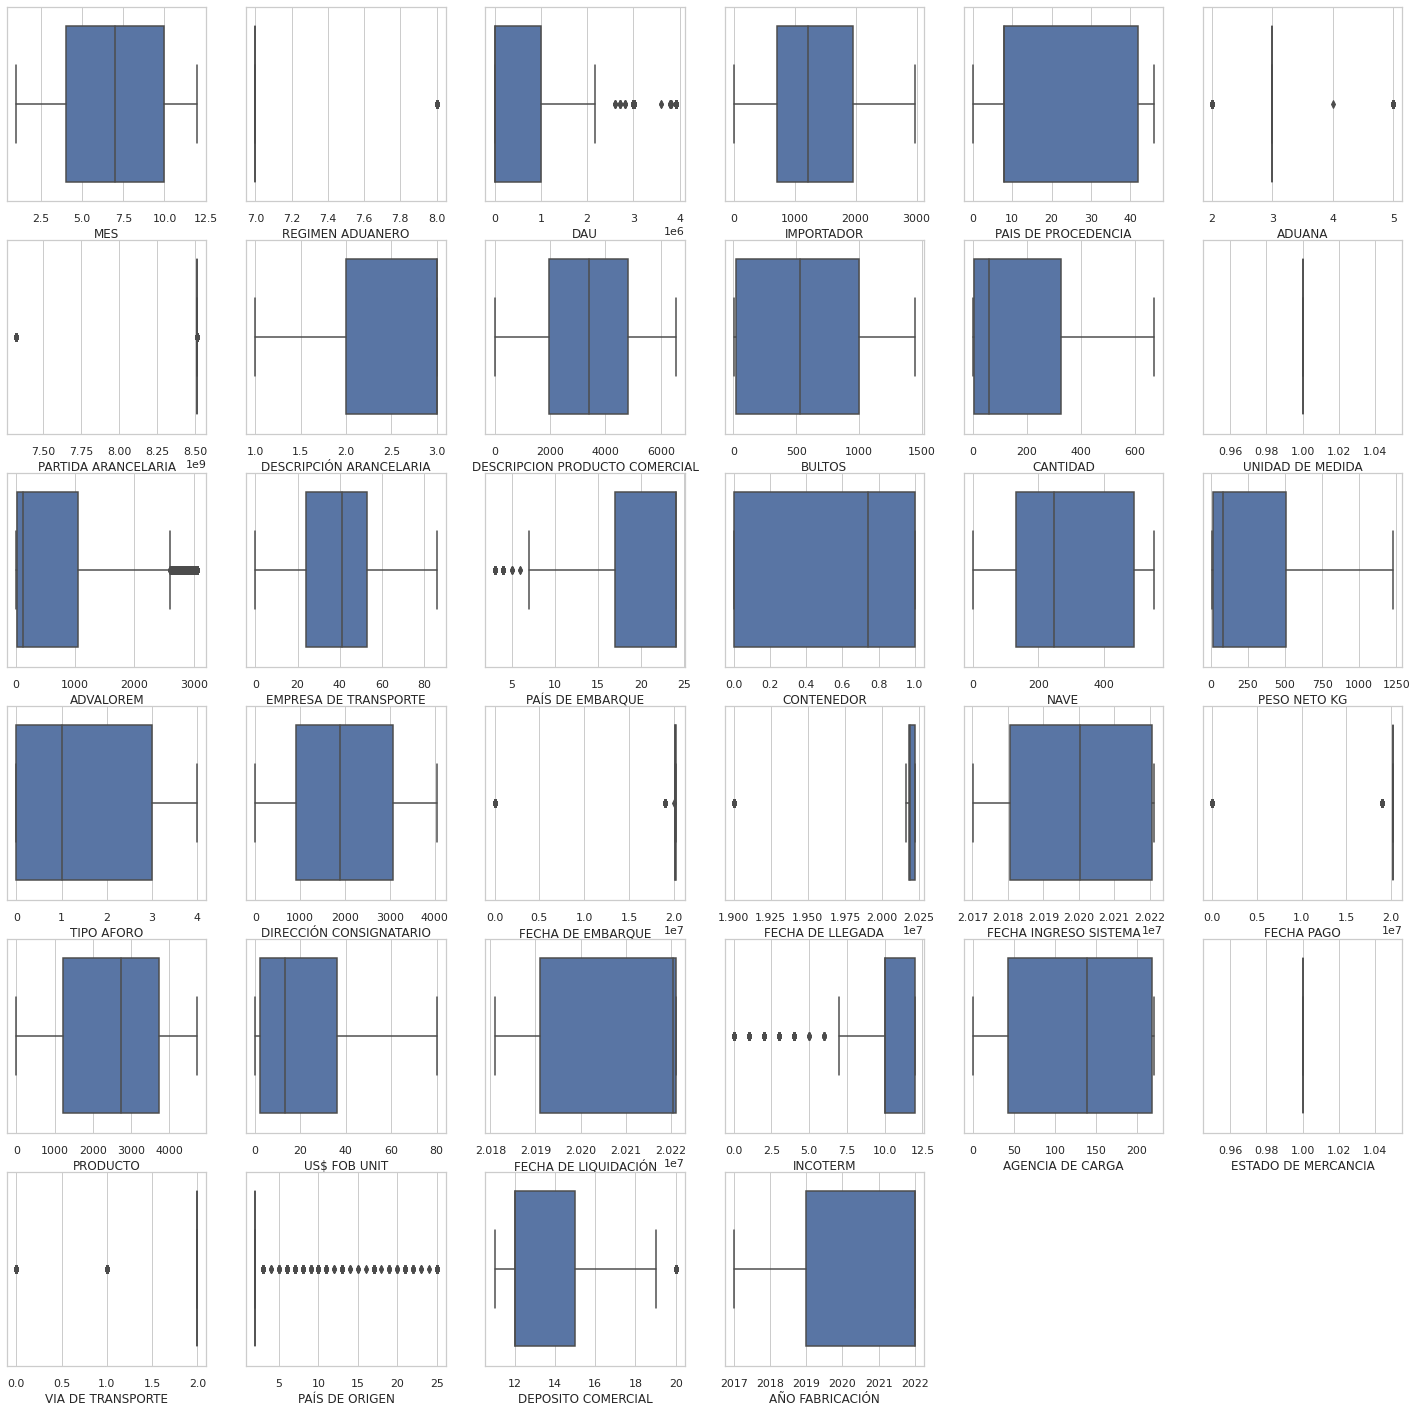

In [95]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [96]:
df.columns[5:8]

Index(['ADUANA', 'PARTIDA ARANCELARIA', 'DESCRIPCIÓN ARANCELARIA'], dtype='object')

In [97]:
c1 = df.columns[5:8]
for i in c1:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-97-f62d76459a6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-97-f62d76459a6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


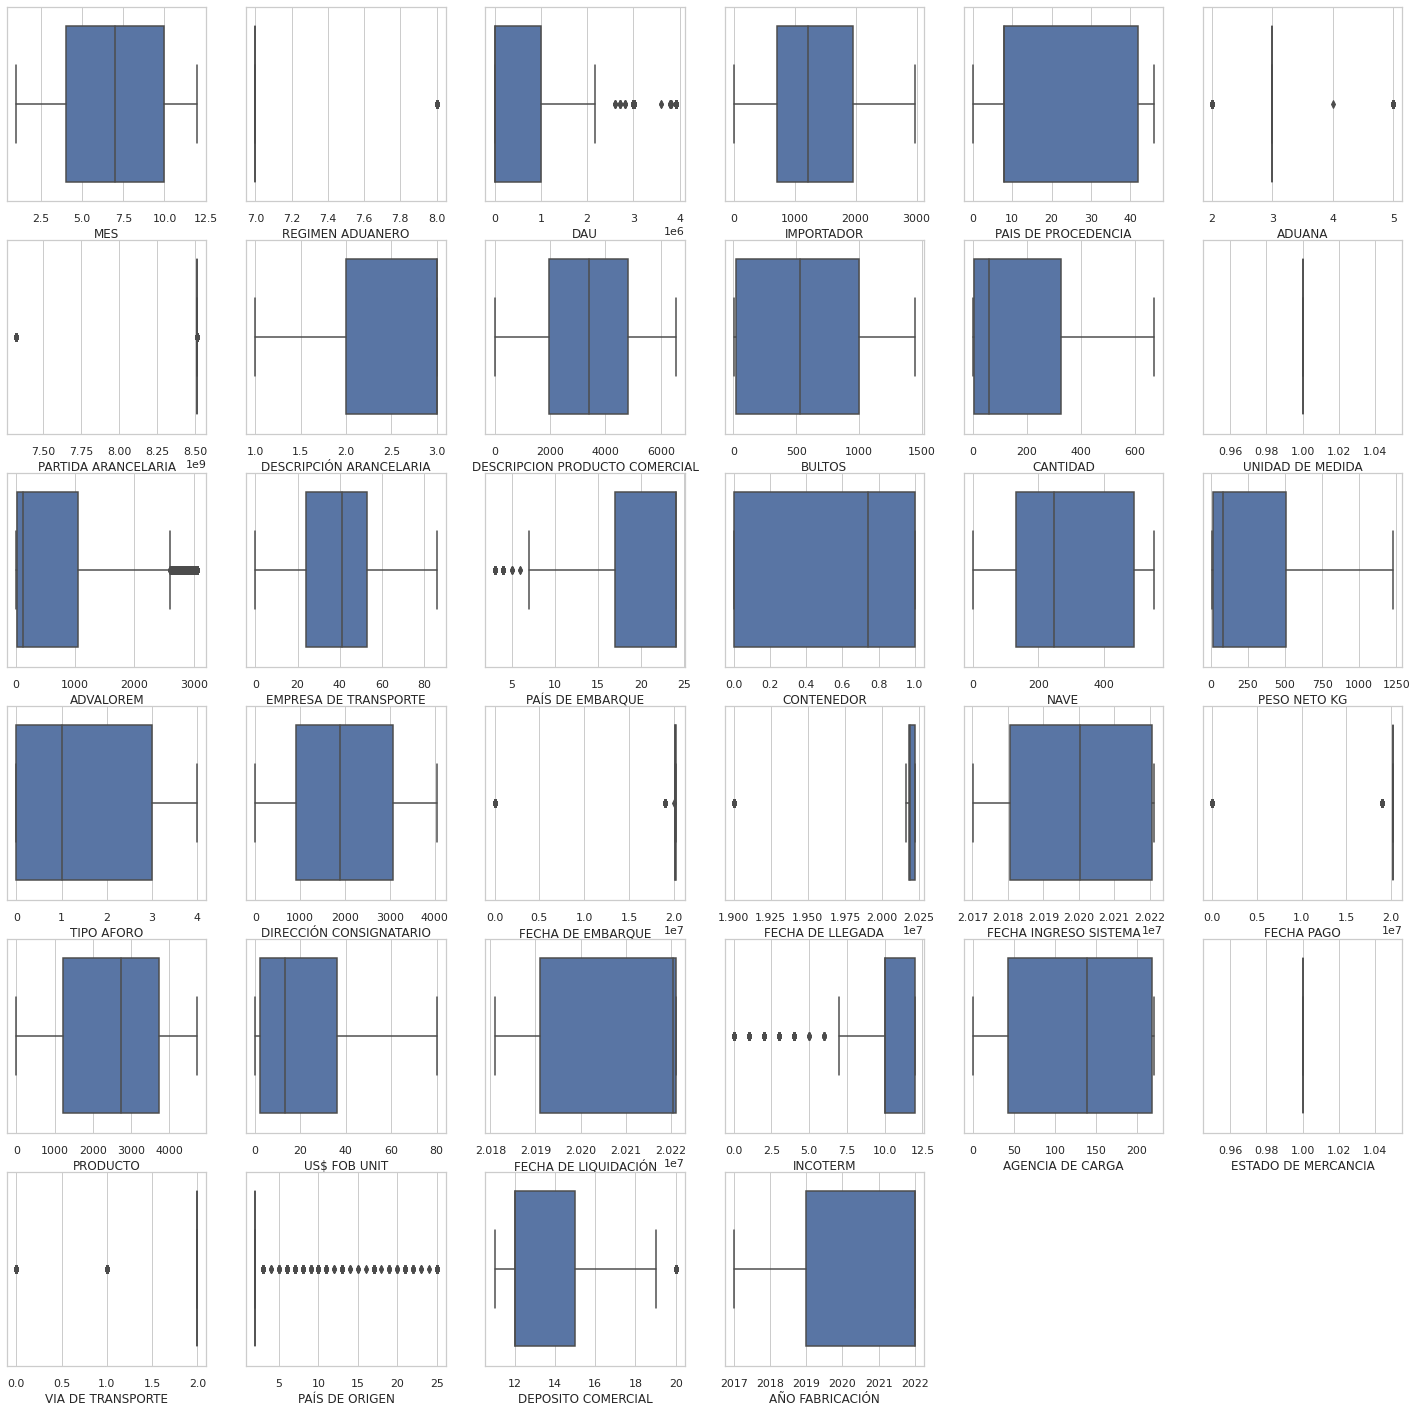

In [98]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [99]:
df.columns[9:13]

Index(['BULTOS', 'CANTIDAD', 'UNIDAD DE MEDIDA', 'ADVALOREM'], dtype='object')

In [100]:
c1 = df.columns[9:13]
for i in c1:
  q1 = df[i].quantile(0.15)
  q4 = df[i].quantile(0.85)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-100-aefef39a8646>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-100-aefef39a8646>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


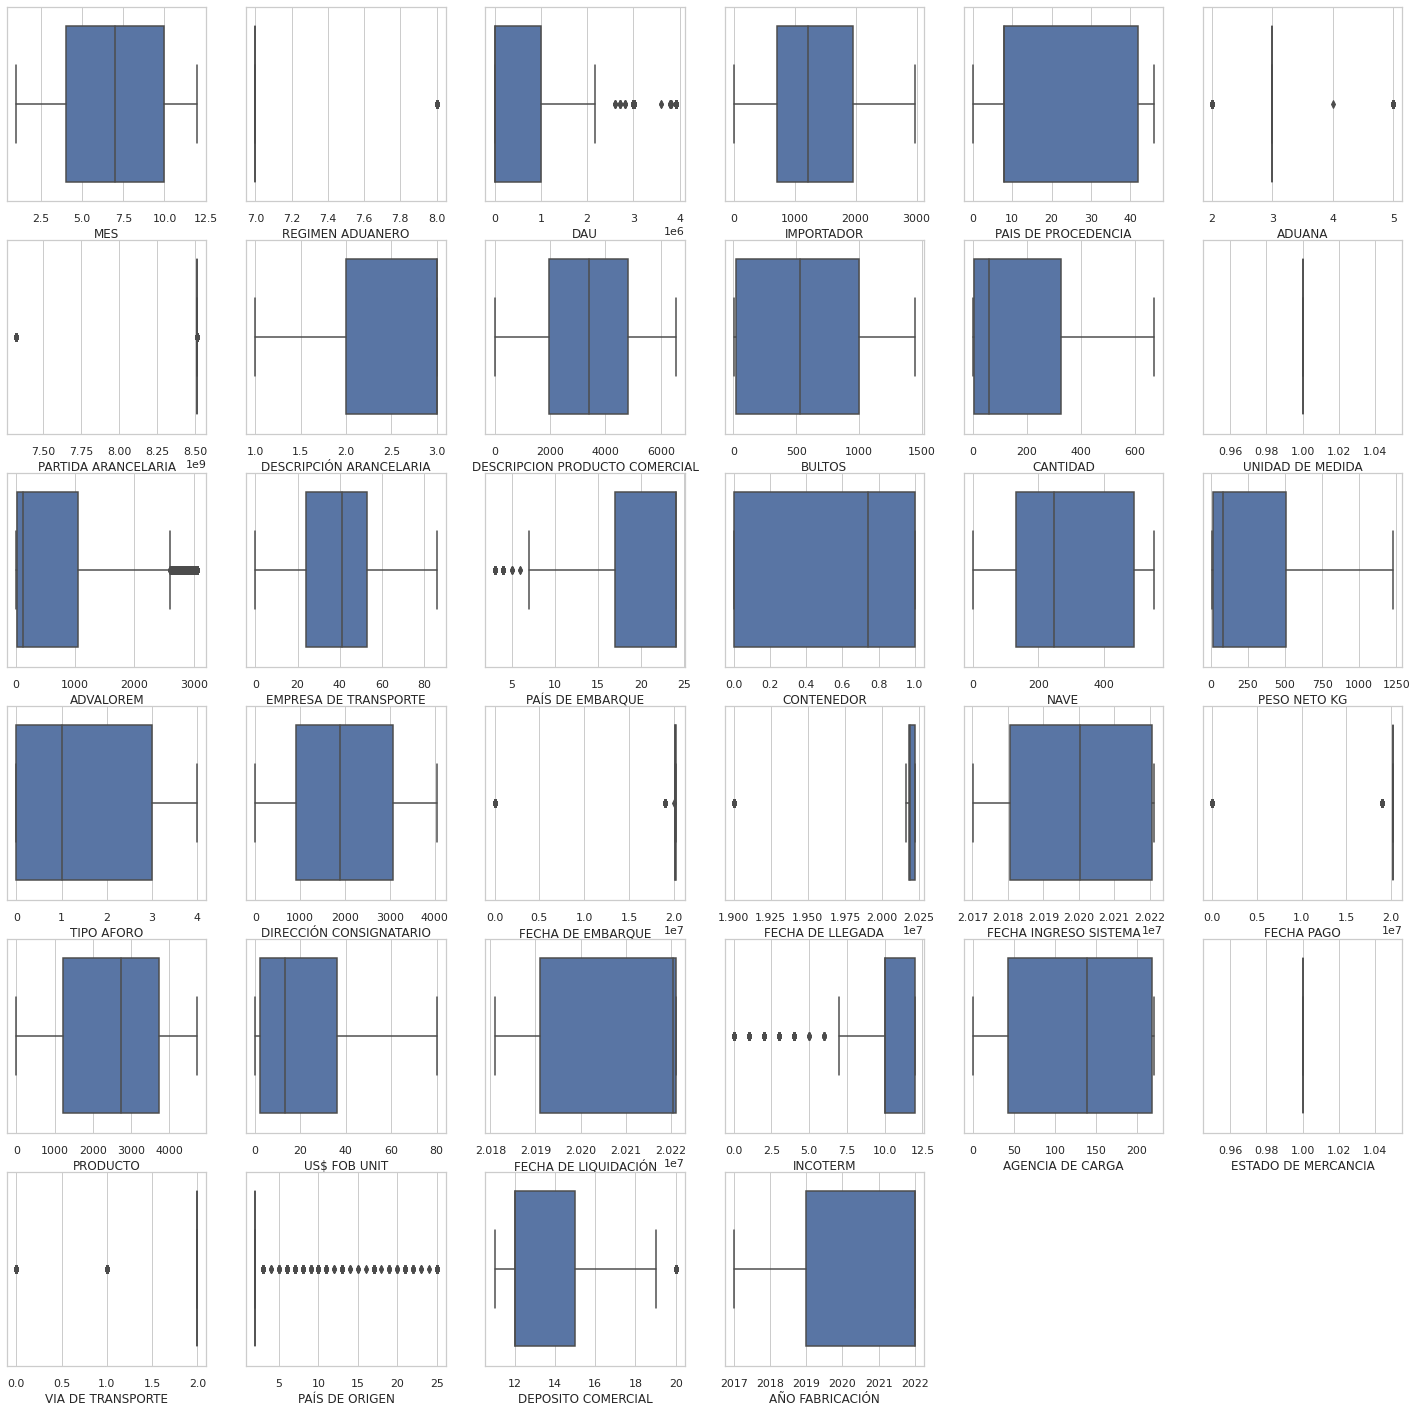

In [101]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [102]:
df.columns[14:16]

Index(['PAÍS DE EMBARQUE', 'CONTENEDOR'], dtype='object')

In [103]:
c1 = df.columns[14:16]
for i in c1:
  q1 = df[i].quantile(0.15)
  q4 = df[i].quantile(0.85)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-103-165c452c75ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-103-165c452c75ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


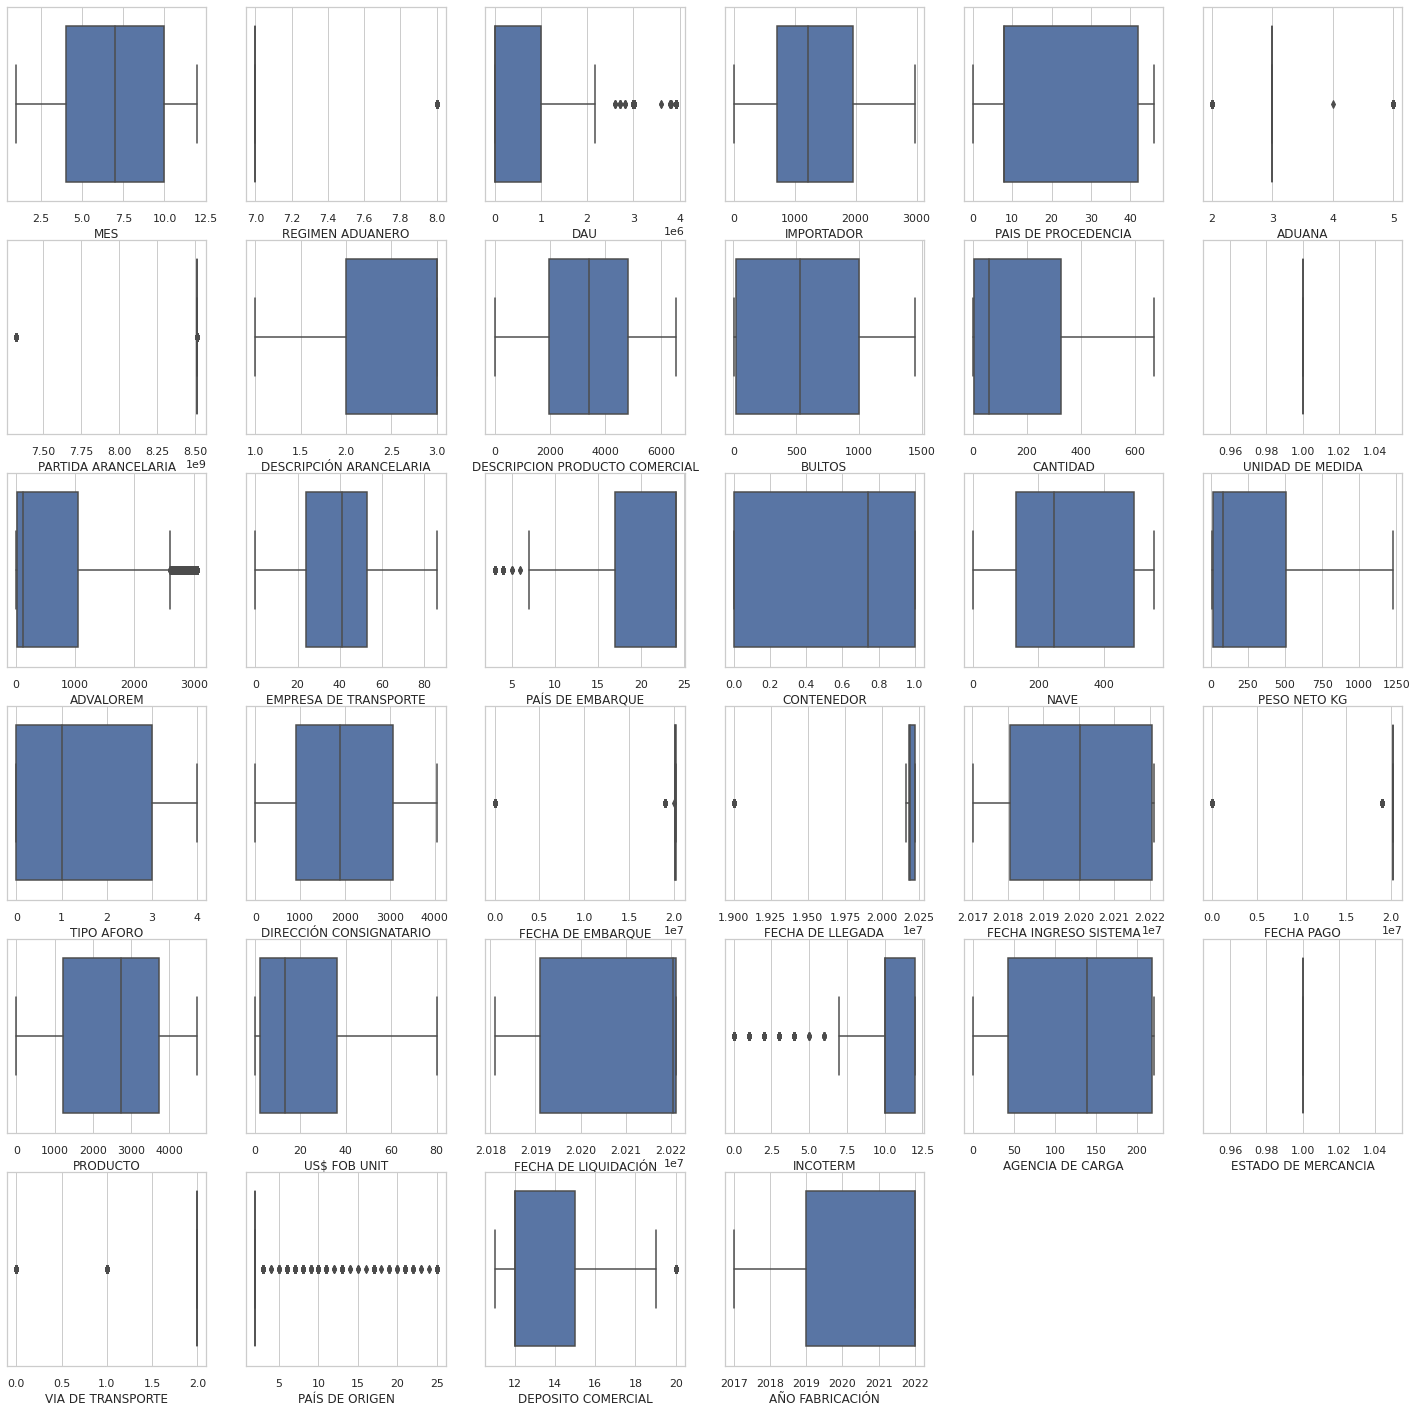

In [104]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [105]:
df.columns[17:18]

Index(['PESO NETO KG'], dtype='object')

In [106]:
c1 = df.columns[17:18]
for i in c1:
  q1 = df[i].quantile(0.17)
  q4 = df[i].quantile(0.83)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-106-265120470cf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-106-265120470cf6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


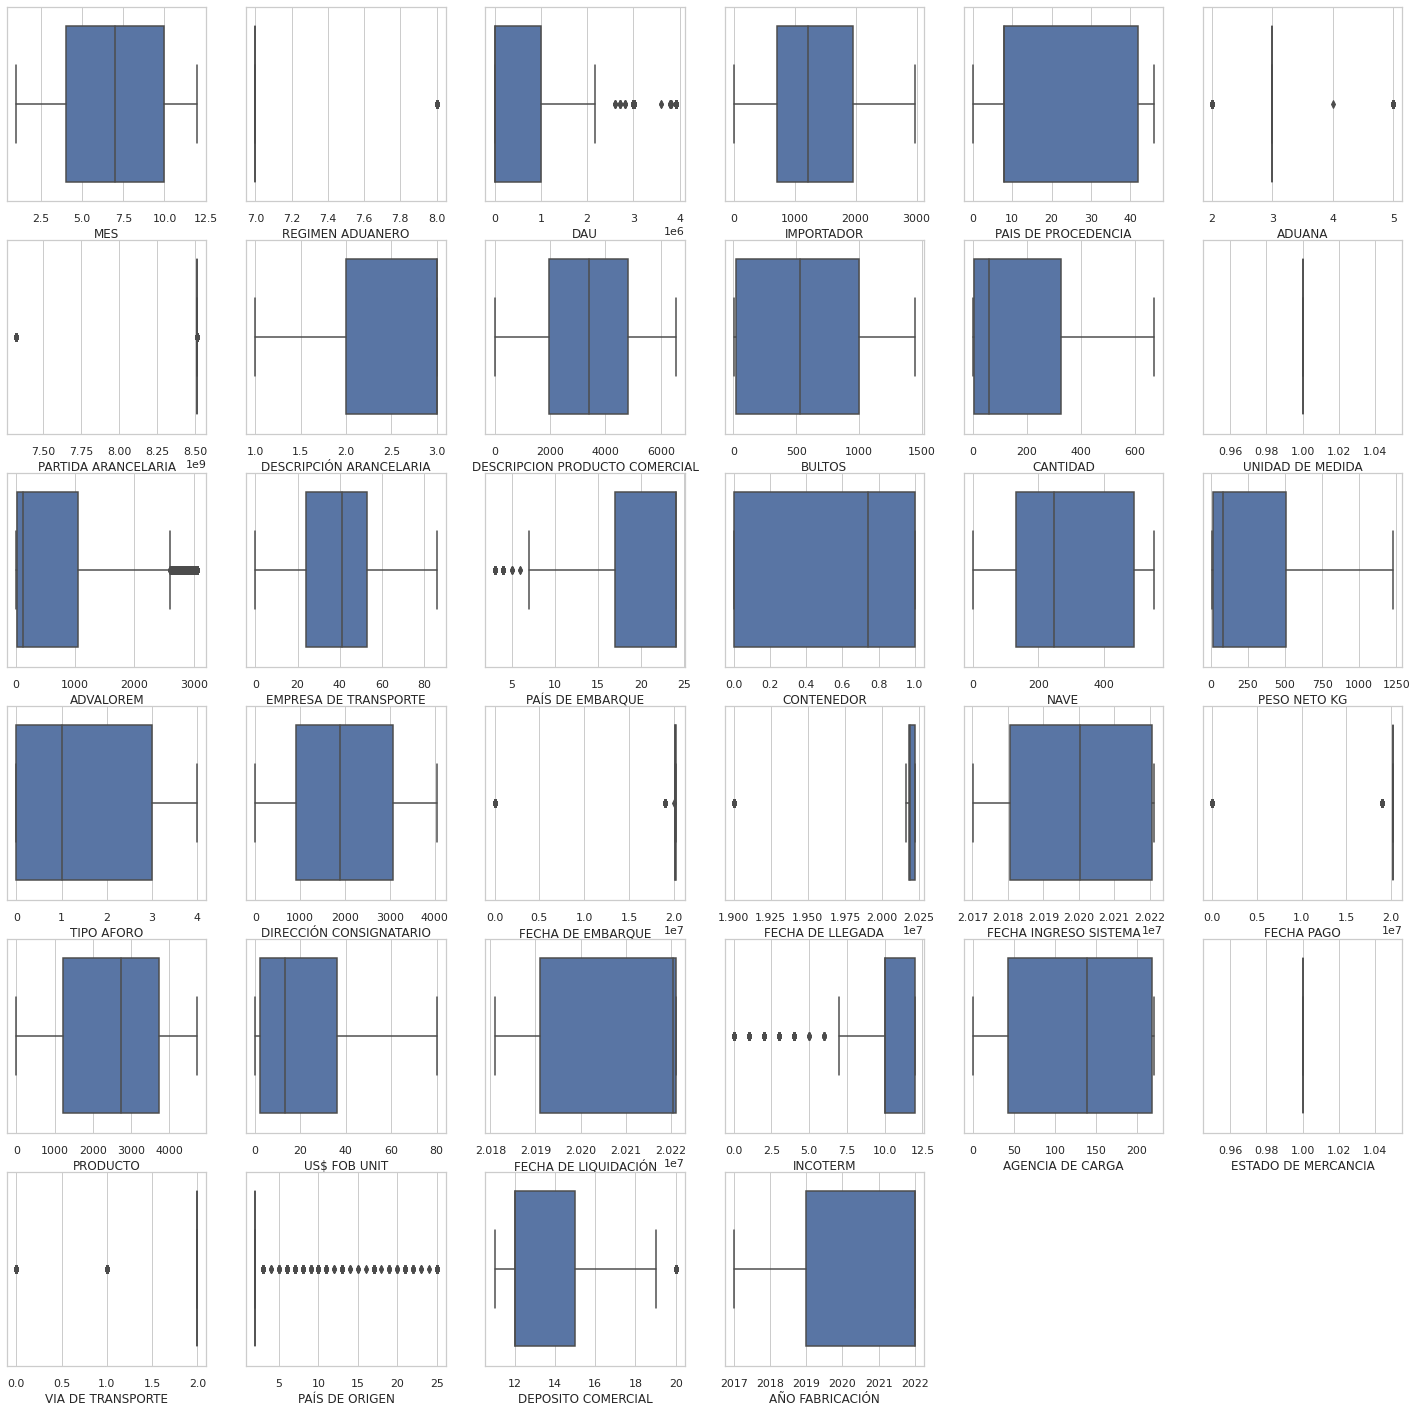

In [107]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [108]:
df.columns[20:22]

Index(['FECHA DE EMBARQUE', 'FECHA DE LLEGADA'], dtype='object')

In [109]:
c1 = df.columns[20:22]
for i in c1:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-109-0e93b8d213a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-109-0e93b8d213a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


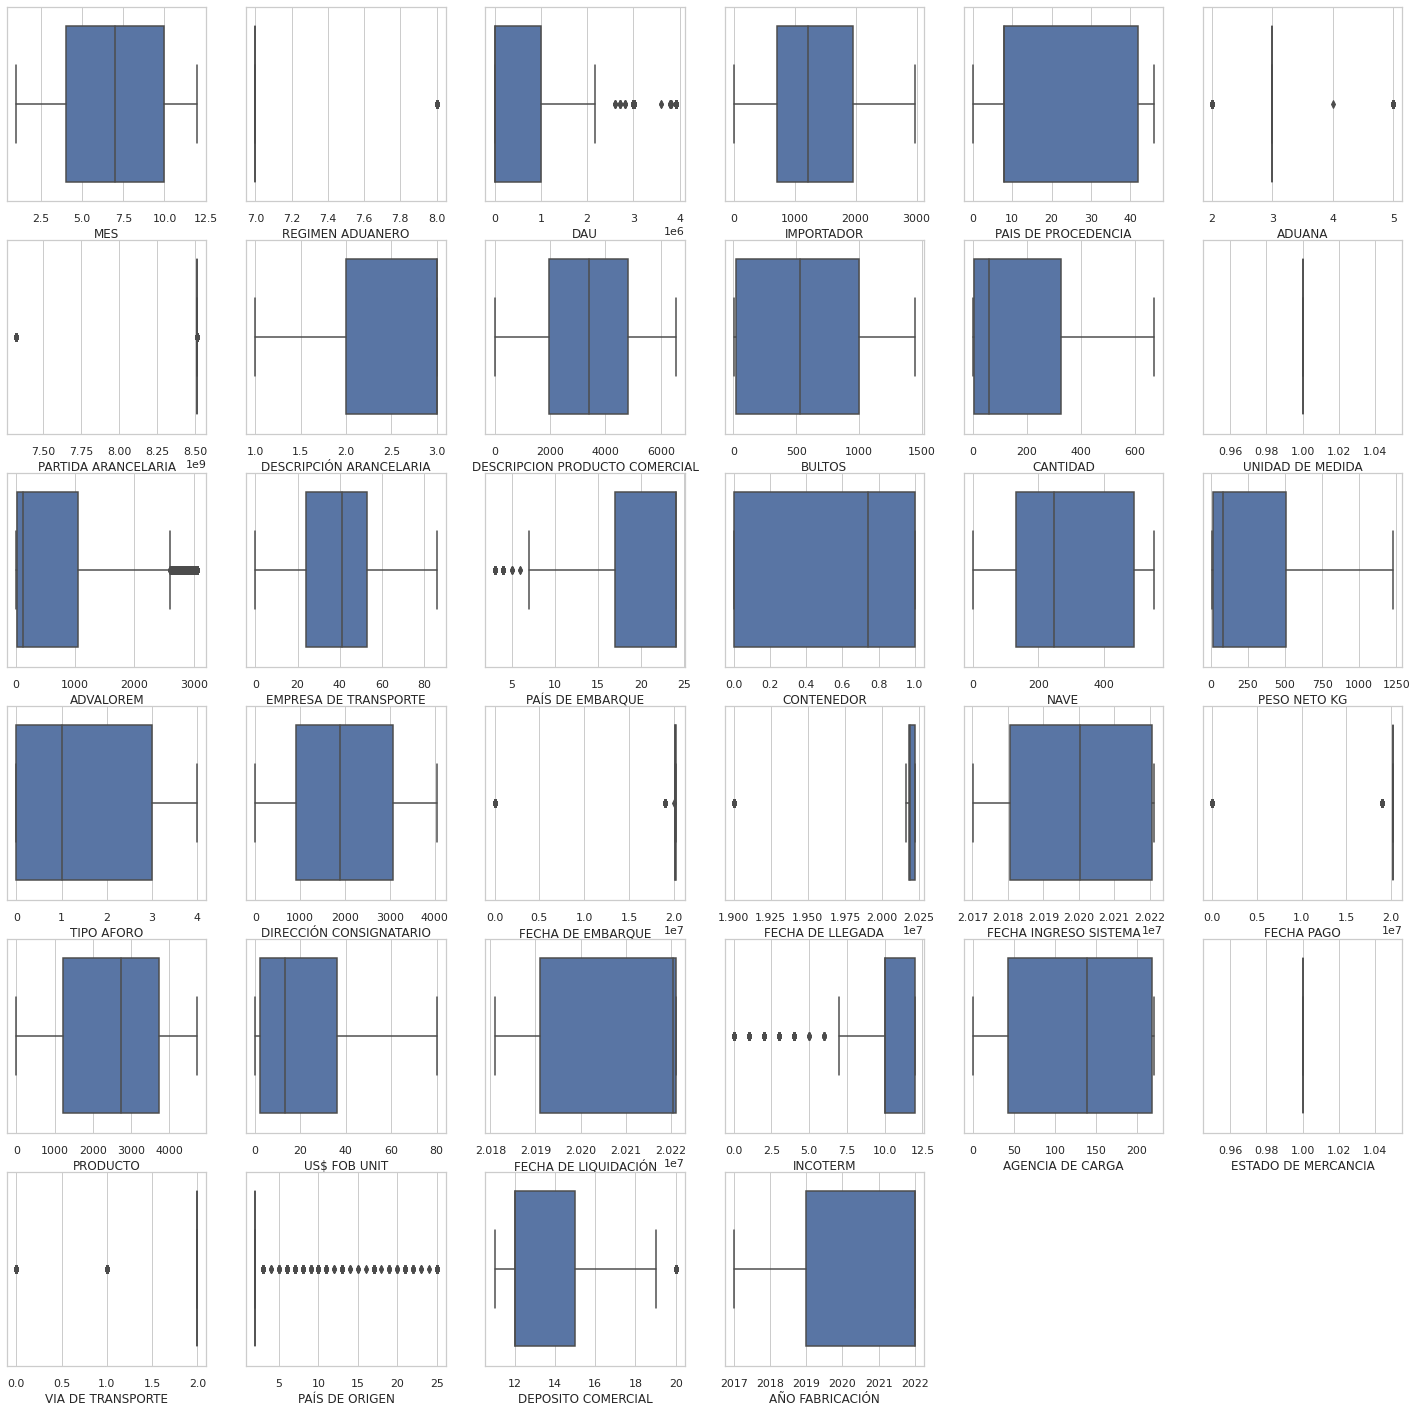

In [110]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [111]:
df.columns[23:24]

Index(['FECHA PAGO'], dtype='object')

In [112]:
c1 = df.columns[23:24]
for i in c1:
  q1 = df[i].quantile(0.1)
  q4 = df[i].quantile(0.9)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-112-65281d330f81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-112-65281d330f81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


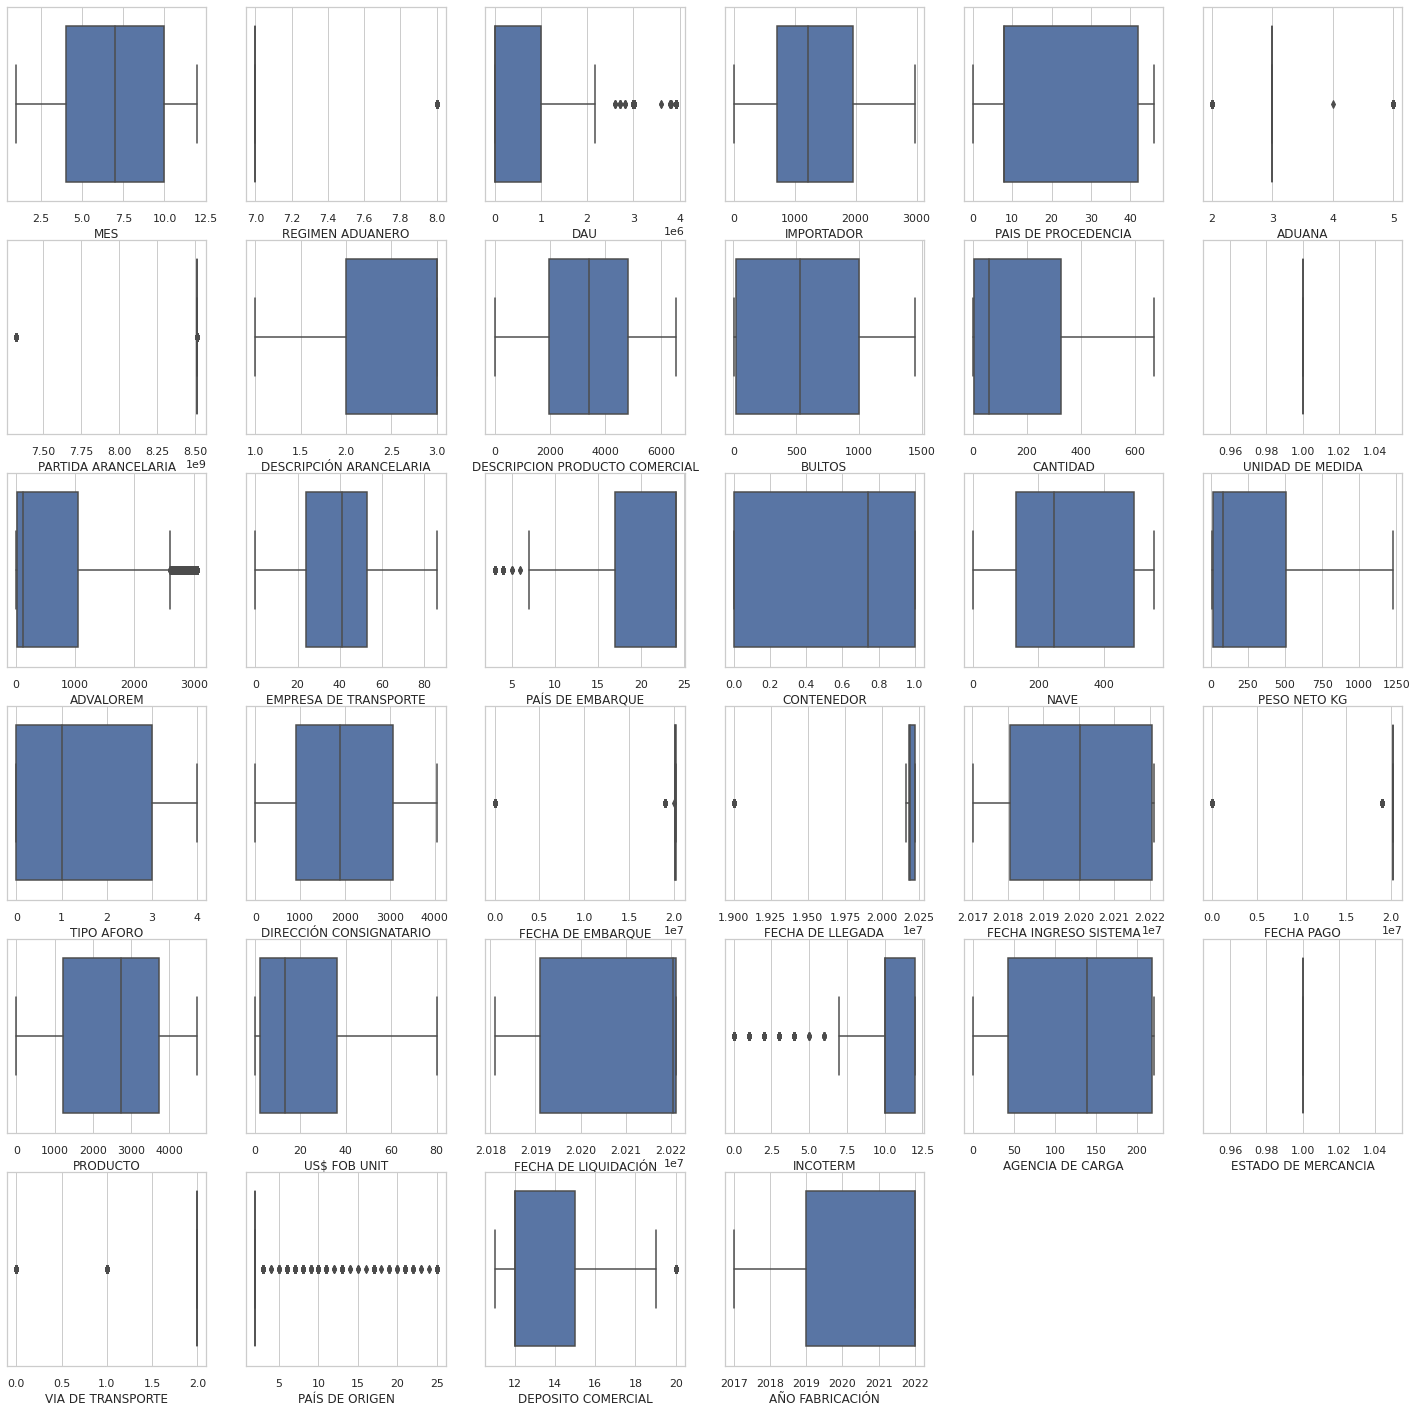

In [113]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [114]:
df.columns[25:28]

Index(['US$ FOB UNIT', 'FECHA DE LIQUIDACIÓN', 'INCOTERM'], dtype='object')

In [115]:
c1 = df.columns[25:28]
for i in c1:
  q1 = df[i].quantile(0.1)
  q4 = df[i].quantile(0.9)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-115-14610e704a6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-115-14610e704a6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


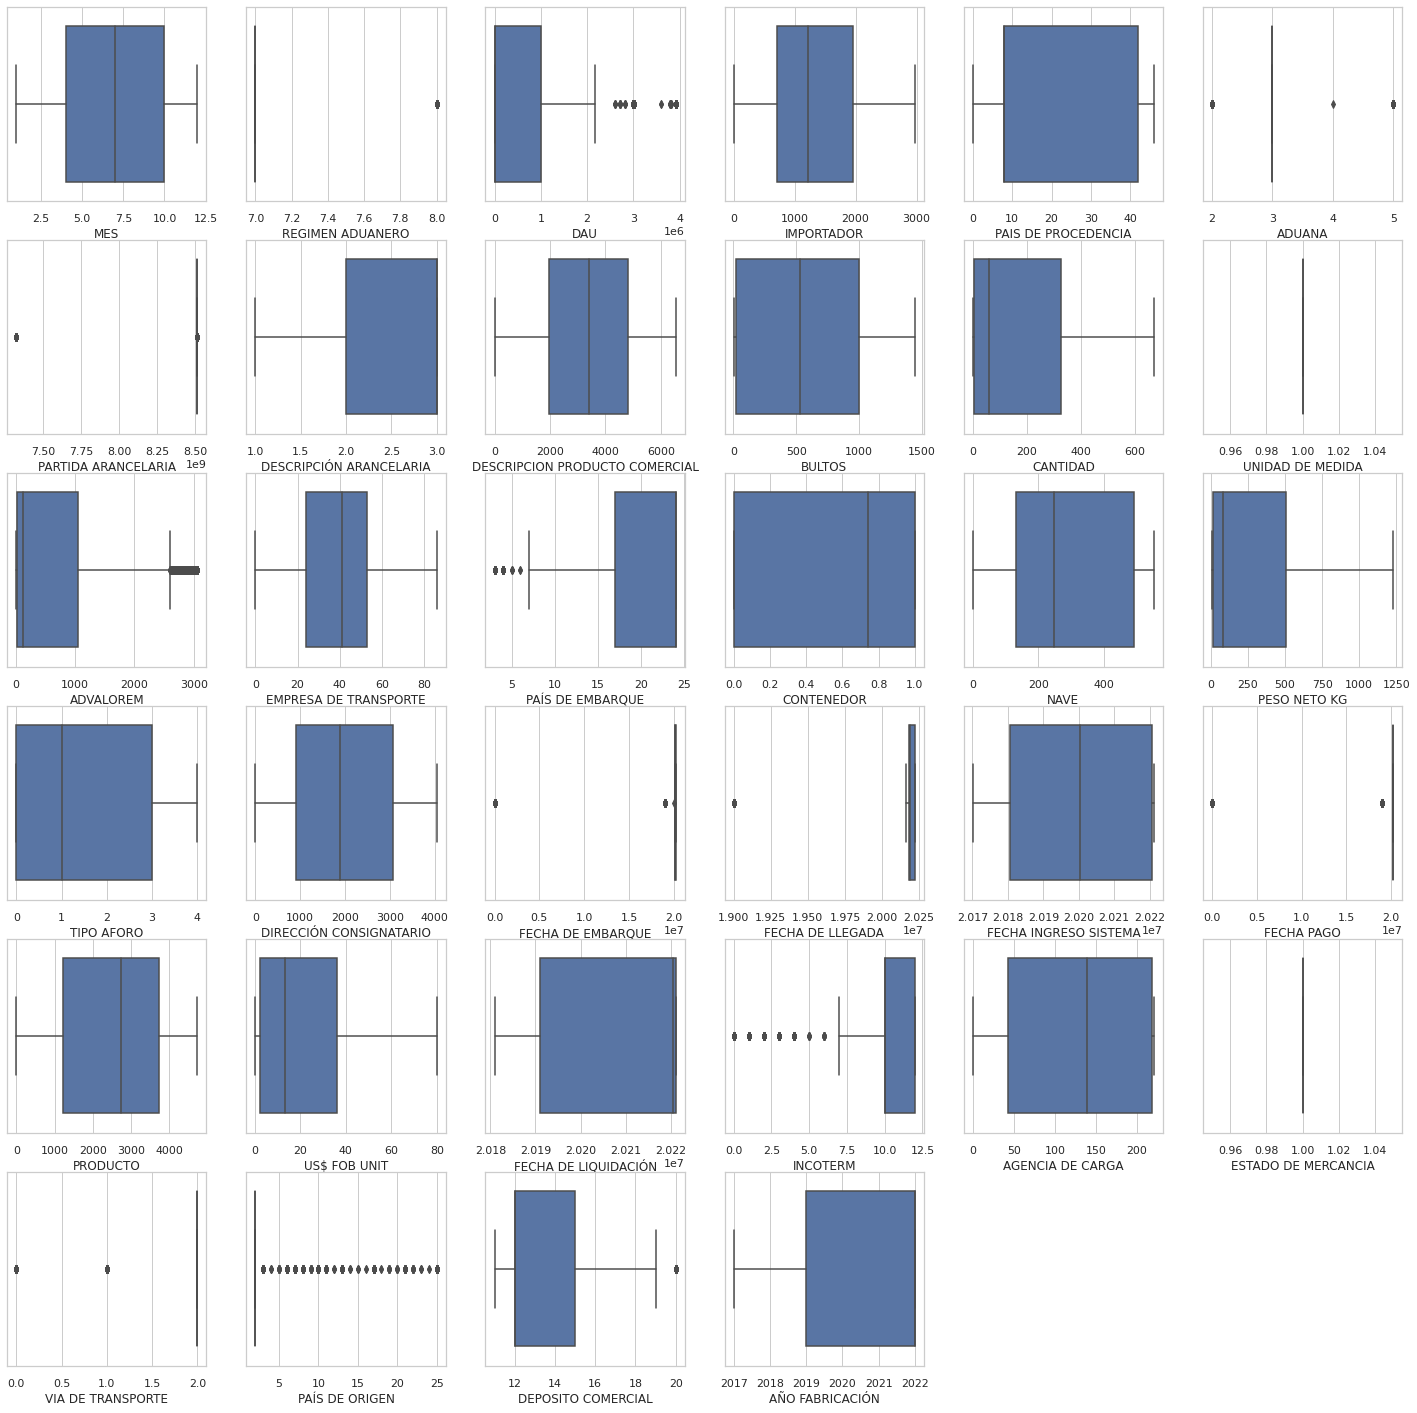

In [116]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [117]:
df.columns[29:35]

Index(['ESTADO DE MERCANCIA', 'VIA DE TRANSPORTE', 'PAÍS DE ORIGEN',
       'DEPOSITO COMERCIAL', 'AÑO FABRICACIÓN'],
      dtype='object')

In [118]:
c1 = df.columns[29:35]
for i in c1:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-118-8c269ba93f51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-118-8c269ba93f51>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4


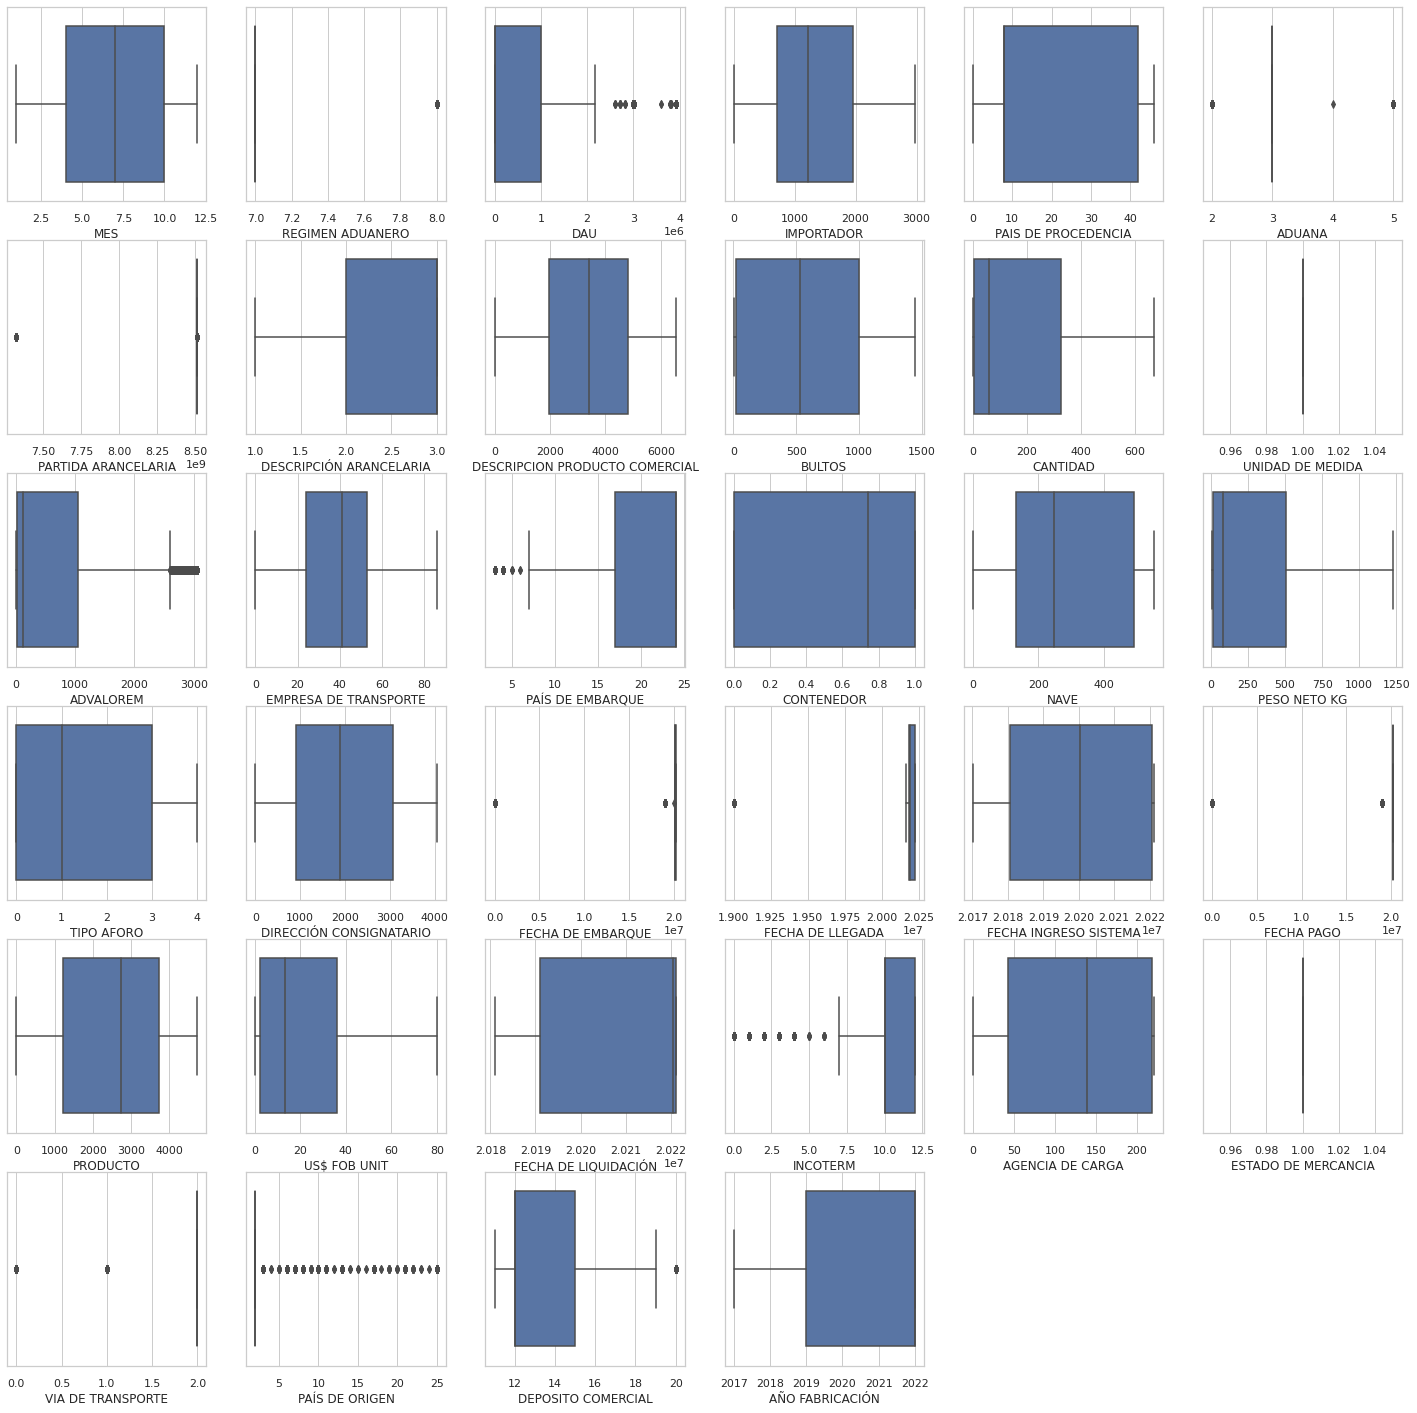

In [119]:
plt.figure(figsize=(25,25))
c = df.columns
for i in enumerate(c):
  plt.subplot(6,6,i[0]+1)
  sns.boxplot(x=i[1],data=df)

SCALER

In [120]:
scaler = MinMaxScaler()
dfScaler = scaler.fit_transform(df)

In [121]:
dfScaler

array([[0.00000000e+00, 0.00000000e+00, 1.53215276e-06, ...,
        0.00000000e+00, 1.11111111e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 4.44444444e-01, 8.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 4.44444444e-01, 8.00000000e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.11111111e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.11111111e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.11111111e-01, 1.00000000e+00]])

In [122]:
dfScaler = pd.DataFrame(dfScaler)
dfScaler.columns = df.columns

In [123]:
dfScaler

MES  REGIMEN ADUANERO       DAU  IMPORTADOR  PAIS DE PROCEDENCIA  \
0      0.0               0.0  0.000002    0.936764             0.173913   
1      0.0               0.0  1.000000    0.078036             0.913043   
2      0.0               0.0  1.000000    0.078036             0.913043   
3      0.0               0.0  1.000000    0.078036             0.913043   
4      0.0               0.0  1.000000    0.078036             0.913043   
...    ...               ...       ...         ...                  ...   
27701  1.0               1.0  1.000000    0.597040             0.913043   
27702  1.0               1.0  1.000000    0.379415             0.913043   
27703  1.0               1.0  1.000000    0.334006             0.913043   
27704  1.0               1.0  1.000000    0.815338             0.913043   
27705  1.0               1.0  1.000000    0.266061             0.913043   

         ADUANA  PARTIDA ARANCELARIA  DESCRIPCIÓN ARANCELARIA  \
0      0.333333             1.000000                      0.5   
1      0.333333             0.999757                      0.0   
2      0.333333             1.000000                      0.5   
3      0.333333             1.000000                      0.5   
4      0.333333             1.000000                      0.5   
...         ...                  ...                      ...   
27701  1.000000             1.000000                      1.0   
27702  0.000000             1.000000                      1.0   
27703  1.000000             1.000000                      1.0   
27704  1.000000             1.000000                      1.0   
27705  1.000000             1.000000                      1.0   

       DESCRIPCION PRODUCTO COMERCIAL    BULTOS  ...  PRODUCTO  US$ FOB UNIT  \
0                            0.660493  0.340956  ...  0.658568      0.000000   
1                            0.521659  0.000000  ...  0.541728      0.110839   
2                            0.633094  0.000000  ...  0.639130      0.123378   
3                            0.617634  0.000000  ...  0.625607      0.135916   
4                            0.620542  0.000000  ...  0.629622      0.135916   
...                               ...       ...  ...       ...           ...   
27701                        0.719271  0.000000  ...  1.000000      0.649044   
27702                        0.442523  0.000000  ...  1.000000      0.649044   
27703                        0.838359  0.000000  ...  1.000000      0.649044   
27704                        0.566662  0.000693  ...  1.000000      0.649044   
27705                        0.232971  0.000000  ...  1.000000      0.649044   

       FECHA DE LIQUIDACIÓN  INCOTERM  AGENCIA DE CARGA  ESTADO DE MERCANCIA  \
0                  0.975237  0.833333          0.986425                  0.0   
1                  0.975013  0.833333          0.574661                  0.0   
2                  0.975013  0.833333          0.574661                  0.0   
3                  0.975013  0.833333          0.574661                  0.0   
4                  0.975013  0.833333          0.574661                  0.0   
...                     ...       ...               ...                  ...   
27701              1.000000  1.000000          1.000000                  0.0   
27702              1.000000  1.000000          1.000000                  0.0   
27703              1.000000  1.000000          1.000000                  0.0   
27704              1.000000  1.000000          1.000000                  0.0   
27705              1.000000  1.000000          1.000000                  0.0   

       VIA DE TRANSPORTE  PAÍS DE ORIGEN  DEPOSITO COMERCIAL  AÑO FABRICACIÓN  
0                    1.0             0.0            0.111111              1.0  
1                    1.0             1.0            0.444444              0.8  
2                    1.0             1.0            0.444444              0.8  
3                    1.0             1.0            0.444444              0.8  
4  

HOPKINS

In [124]:
hopkins(dfScaler,dfScaler.shape[0]) 

0.05597940220296848

KMEANS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

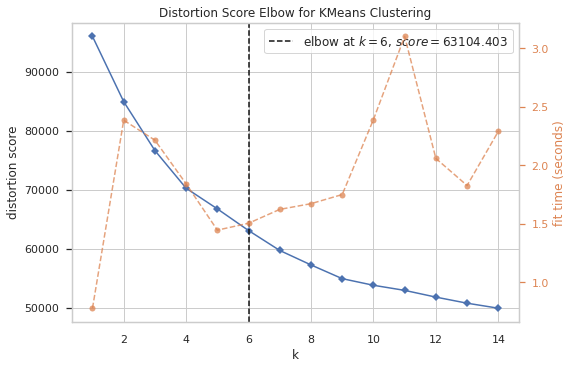

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
feature = dfScaler.iloc[:,:]
kmeans = KMeans()
visualizador = KElbowVisualizer(kmeans,k=(1,15))
visualizador.fit(feature)
visualizador.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

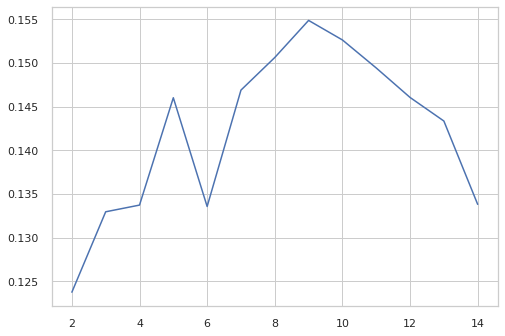

In [126]:
si = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(dfScaler)
  si.append([k,silhouette_score(dfScaler,kmeans.labels_)])
si = pd.DataFrame(si)
plt.plot(si[0],si[1])

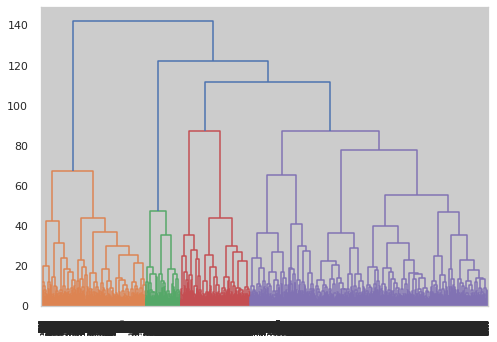

In [127]:
dendogram = sch.dendrogram(sch.linkage(dfScaler,method="ward",metric="euclidean"))

In [134]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(dfScaler)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [135]:
kmeans.labels_

array([3, 3, 2, ..., 2, 2, 2], dtype=int32)

In [136]:
df['label'] = kmeans.labels_

In [137]:
df['label'].value_counts()

1    10813
3     7654
0     5510
2     3729
Name: label, dtype: int64

In [138]:
df.groupby('label').mean()

MES  REGIMEN ADUANERO           DAU   IMPORTADOR  \
label                                                          
0      6.854265          7.000000  4.419203e+05  1263.355717   
1      7.170720          7.000555  4.438606e+05  1313.708314   
2      7.234379          7.585680  2.510174e+06  1320.382944   
3      6.804024          7.000000  3.991112e+05  1391.510191   

       PAIS DE PROCEDENCIA    ADUANA  PARTIDA ARANCELARIA  \
label                                                       
0                12.325771  3.030127         8.501322e+09   
1                24.029317  3.016184         8.323263e+09   
2                36.223921  3.853044         8.408319e+09   
3                19.248236  3.027959         8.383361e+09   

       DESCRIPCIÓN ARANCELARIA  DESCRIPCION PRODUCTO COMERCIAL      BULTOS  \
label                                                                        
0                     2.612341                     3444.568966  843.673052   
1                     2.999260                     3497.549154  616.167221   
2                     2.640654                     3351.653258   30.153570   
3                     1.960021                     3251.517899  622.884244   

       ...     PRODUCTO  US$ FOB UNIT  FECHA DE LIQUIDACIÓN   INCOTERM  \
label  ...                                                               
0      ...  2529.496915     30.864290          2.020833e+07   9.067877   
1      ...  2409.119393     23.303865          2.020020e+07   9.035698   
2      ...  3960.445428     19.338789          2.020782e+07  10.563690   
3      ...  2135.390123     21.289863          2.022052e+07   7.568853   

       AGENCIA DE CARGA  ESTADO DE MERCANCIA  VIA DE TRANSPORTE  \
label                                                             
0            140.309800                  1.0           1.955172   
1            122.927495                  1.0           1.954962   
2            146.294985                  1.0           0.113703   
3            132.885158                  1.0           1.982493   

       PAÍS DE ORIGEN  DEPOSITO COMERCIAL  AÑO FABRICACIÓN  
label                                                       
0            2.121960           13.048094      2020.262613  
1            2.012762           13.571719      2019.535836  
2            7.758648           14.827031      2021.412711  
3            6.096159           12.669715      2021.879540  

[4 rows x 34 columns]

In [139]:
df.to_excel("gruposExamenIIB.xlsx")